<h1 style='background:#2F8F9D; border:0; color:#FBCB0A'><center>HOUSE PRRICE PREDICTION</center></h1> 

In [31]:
#importing libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import colors
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_auc_score,roc_curve
from sklearn.metrics import (mean_absolute_error,mean_squared_error,r2_score,f1_score,precision_score,recall_score,
                             mean_absolute_percentage_error)
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Full names of Dataset columns:
~~~
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale
~~~

In [32]:
# importing dataset:
data=pd.read_csv("datasets\\train.csv")
df=data.copy()
df.head().style.set_properties(**{'background-color': 'black',
                            'color': 'cyan',
                            'border-color': 'white'})

In [33]:
# EDA:
print('Shape of the data:',df.shape)
print("****************************")
print('Columns of the data:',df.columns)
print("****************************")
print('Number of unique values:',df.nunique())
print("****************************")
print('Number of duplicated values:',df.duplicated().sum())

Shape of the data: (1460, 81)
****************************
Columns of the data: Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFin

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [35]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [36]:
#Feature engineering:

df.head()



Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [37]:
# create new columns:

import datetime as dt

# age of house
df["AgeOfHouse"]=dt.datetime.now().year-df["YearBuilt"]


In [38]:
# Missing Values
def missing_values_tabl(df):
    
    na_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (df[na_columns].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio,2)], axis=1, keys=['n_miss', 'ratio'])
    missing_df = pd.DataFrame(missing_df)
    return missing_df
   
    
missing_values_tabl(df)

n_miss  ratio
PoolQC          1453  99.52
MiscFeature     1406  96.30
Alley           1369  93.77
Fence           1179  80.75
MasVnrType       872  59.73
FireplaceQu      690  47.26
LotFrontage      259  17.74
GarageType        81   5.55
GarageYrBlt       81   5.55
GarageFinish      81   5.55
GarageQual        81   5.55
GarageCond        81   5.55
BsmtFinType2      38   2.60
BsmtExposure      38   2.60
BsmtFinType1      37   2.53
BsmtCond          37   2.53
BsmtQual          37   2.53
MasVnrArea         8   0.55
Electrical         1   0.07

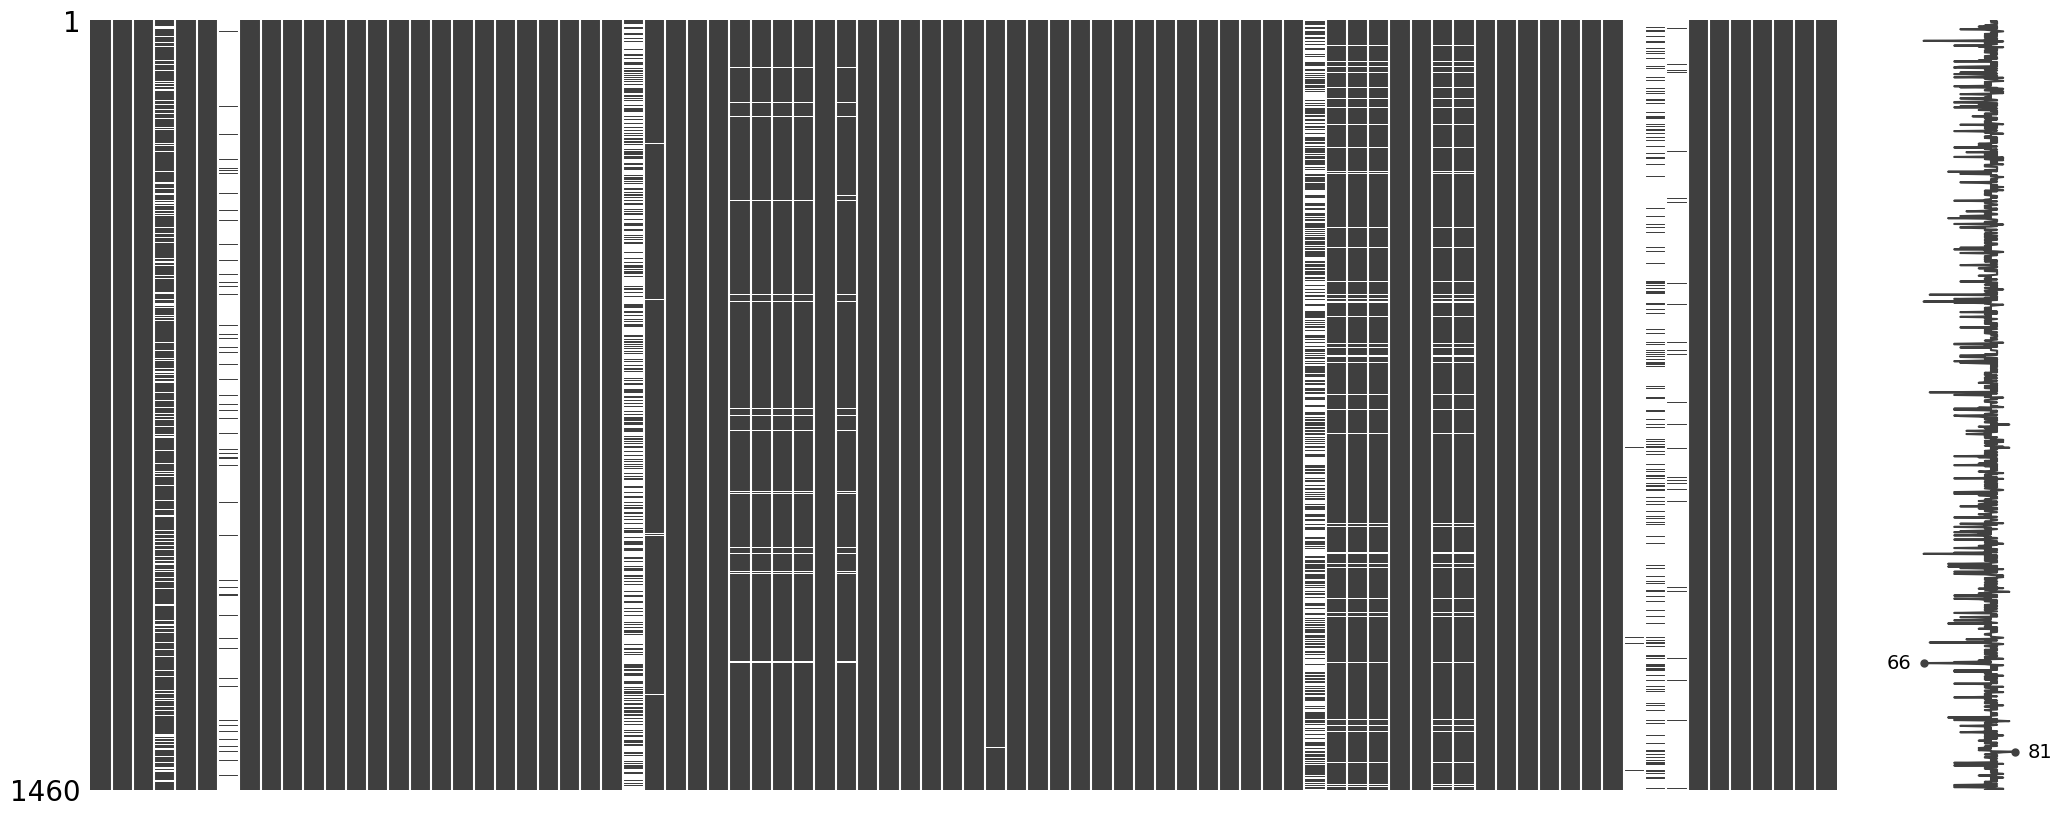

In [39]:
# visualize missing values
import missingno as msno
msno.matrix(df);
plt.show()

In [40]:
# handling missing values

# if the column has more than 80% missing values, drop it

the_columns=["Alley","PoolQC","Fence","MiscFeature"]

df.drop(the_columns,axis=1,inplace=True)

def missing_values_tabl(df):
    
    na_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (df[na_columns].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio,2)], axis=1, keys=['n_miss', 'ratio'])
    missing_df = pd.DataFrame(missing_df)
    return missing_df
   
    
missing_values_tabl(df)



n_miss  ratio
MasVnrType       872  59.73
FireplaceQu      690  47.26
LotFrontage      259  17.74
GarageType        81   5.55
GarageYrBlt       81   5.55
GarageFinish      81   5.55
GarageQual        81   5.55
GarageCond        81   5.55
BsmtExposure      38   2.60
BsmtFinType2      38   2.60
BsmtQual          37   2.53
BsmtCond          37   2.53
BsmtFinType1      37   2.53
MasVnrArea         8   0.55
Electrical         1   0.07

In [41]:
# filling missing values with ML model

from sklearn.impute import KNNImputer
knn=KNNImputer(n_neighbors=15)
num=df.select_dtypes(include=['float64','int64'])    
for i in num.columns:
   df[i]=knn.fit_transform(df[[i]])
      
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType       872
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [42]:
nan_cat_columns = [col for col in df.columns if df[col].dtypes == "O" and df[col].isnull().sum() > 0]


for i in nan_cat_columns:
    
    df[i].fillna(method="bfill",inplace=True)   # fill with the next value
    df[i].fillna(method="ffill",inplace=True)   # fill with the previous value
    
df[nan_cat_columns].isnull().sum()

MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

          MSZoning      Ratio
MSZoning                     
RL            1151  78.835616
RM             218  14.931507
FV              65   4.452055
RH              16   1.095890
C (all)         10   0.684932
##########################################


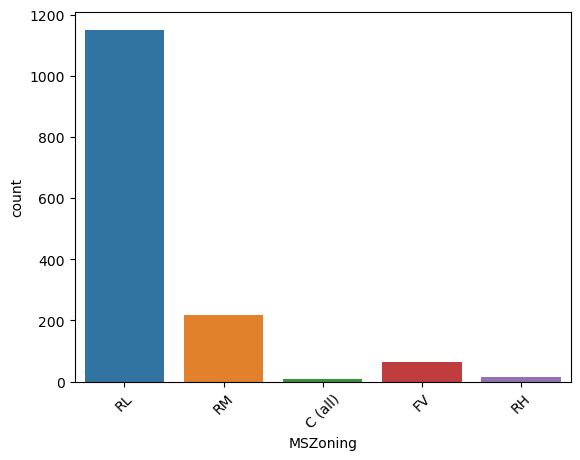

        Street      Ratio
Street                   
Pave      1454  99.589041
Grvl         6   0.410959
##########################################


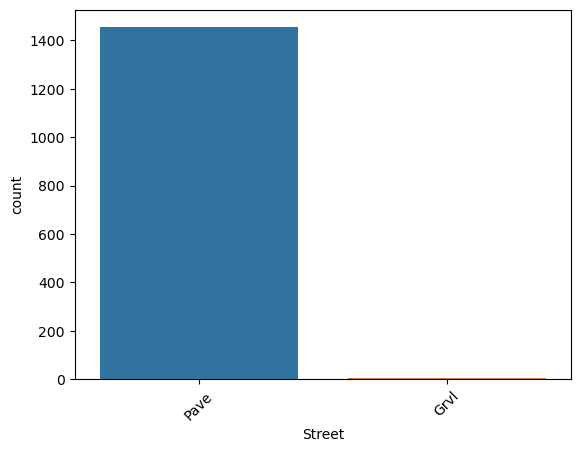

          LotShape      Ratio
LotShape                     
Reg            925  63.356164
IR1            484  33.150685
IR2             41   2.808219
IR3             10   0.684932
##########################################


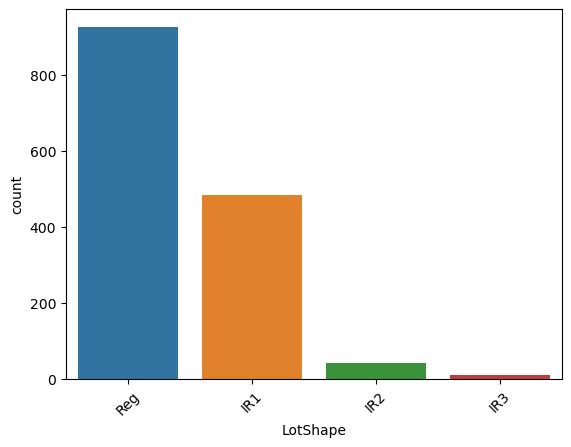

             LandContour      Ratio
LandContour                        
Lvl                 1311  89.794521
Bnk                   63   4.315068
HLS                   50   3.424658
Low                   36   2.465753
##########################################


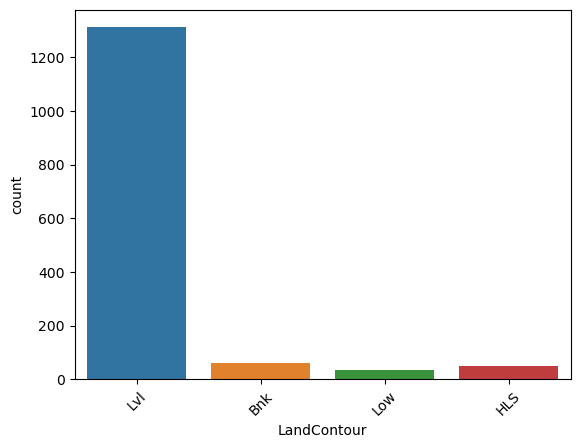

           Utilities      Ratio
Utilities                      
AllPub          1459  99.931507
NoSeWa             1   0.068493
##########################################


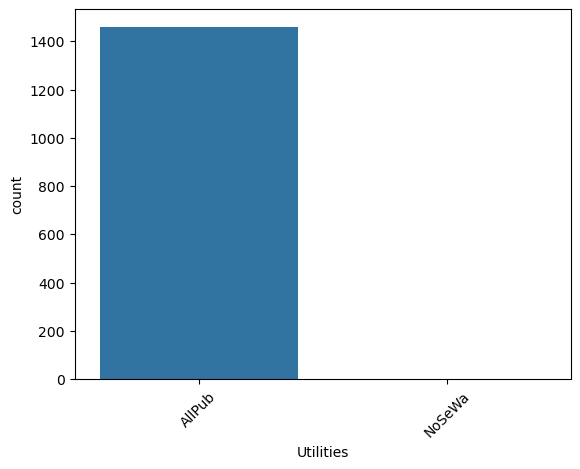

           LotConfig      Ratio
LotConfig                      
Inside          1052  72.054795
Corner           263  18.013699
CulDSac           94   6.438356
FR2               47   3.219178
FR3                4   0.273973
##########################################


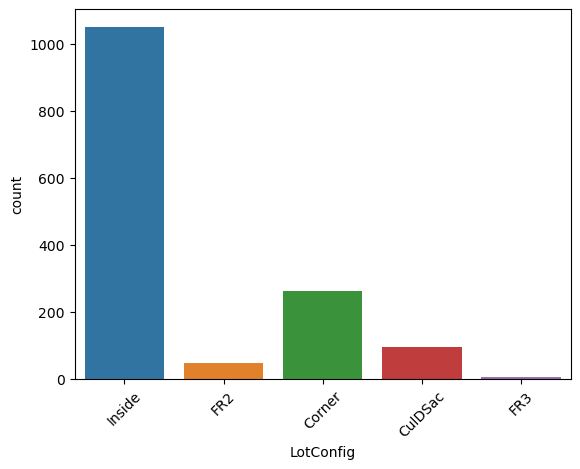

           LandSlope      Ratio
LandSlope                      
Gtl             1382  94.657534
Mod               65   4.452055
Sev               13   0.890411
##########################################


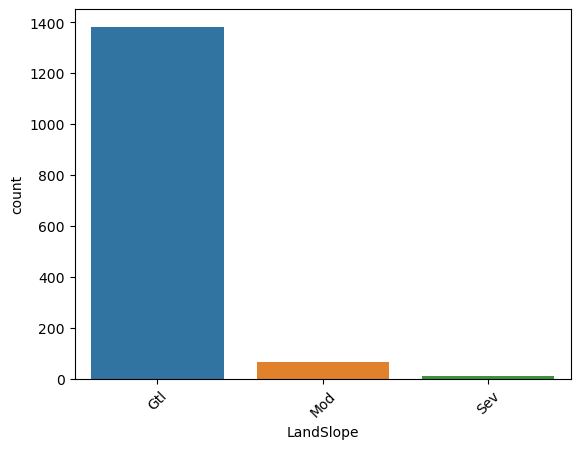

            Condition1      Ratio
Condition1                       
Norm              1260  86.301370
Feedr               81   5.547945
Artery              48   3.287671
RRAn                26   1.780822
PosN                19   1.301370
RRAe                11   0.753425
PosA                 8   0.547945
RRNn                 5   0.342466
RRNe                 2   0.136986
##########################################


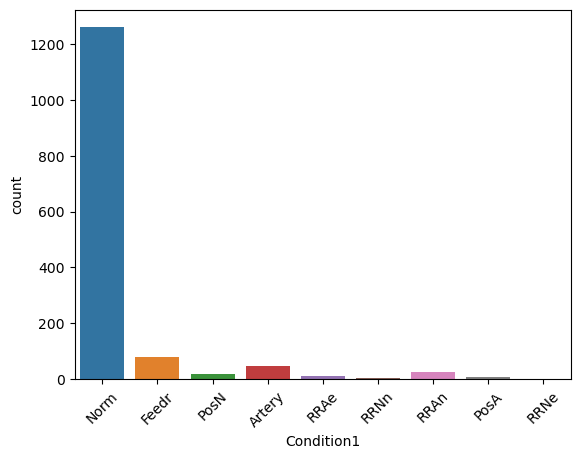

            Condition2      Ratio
Condition2                       
Norm              1445  98.972603
Feedr                6   0.410959
Artery               2   0.136986
RRNn                 2   0.136986
PosN                 2   0.136986
PosA                 1   0.068493
RRAn                 1   0.068493
RRAe                 1   0.068493
##########################################


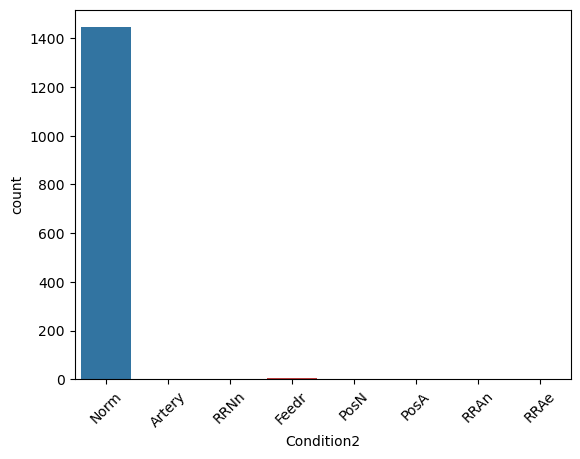

          BldgType      Ratio
BldgType                     
1Fam          1220  83.561644
TwnhsE         114   7.808219
Duplex          52   3.561644
Twnhs           43   2.945205
2fmCon          31   2.123288
##########################################


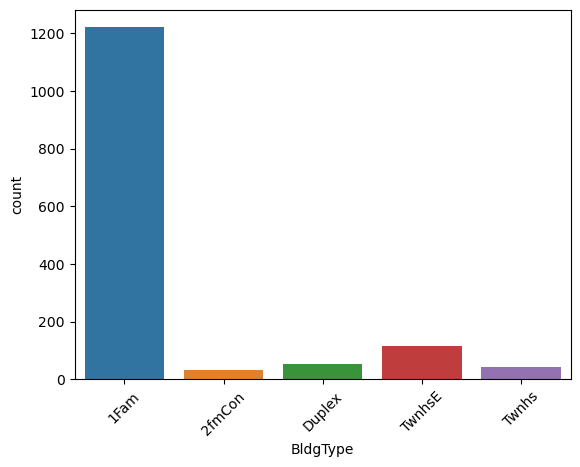

            HouseStyle      Ratio
HouseStyle                       
1Story             726  49.726027
2Story             445  30.479452
1.5Fin             154  10.547945
SLvl                65   4.452055
SFoyer              37   2.534247
1.5Unf              14   0.958904
2.5Unf              11   0.753425
2.5Fin               8   0.547945
##########################################


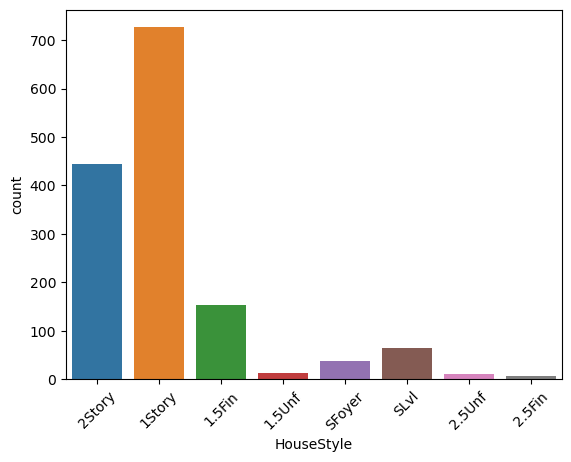

           RoofStyle      Ratio
RoofStyle                      
Gable           1141  78.150685
Hip              286  19.589041
Flat              13   0.890411
Gambrel           11   0.753425
Mansard            7   0.479452
Shed               2   0.136986
##########################################


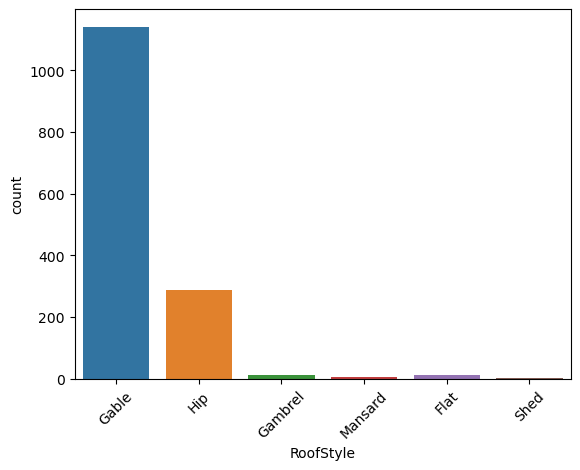

          RoofMatl      Ratio
RoofMatl                     
CompShg       1434  98.219178
Tar&Grv         11   0.753425
WdShngl          6   0.410959
WdShake          5   0.342466
Metal            1   0.068493
Membran          1   0.068493
Roll             1   0.068493
ClyTile          1   0.068493
##########################################


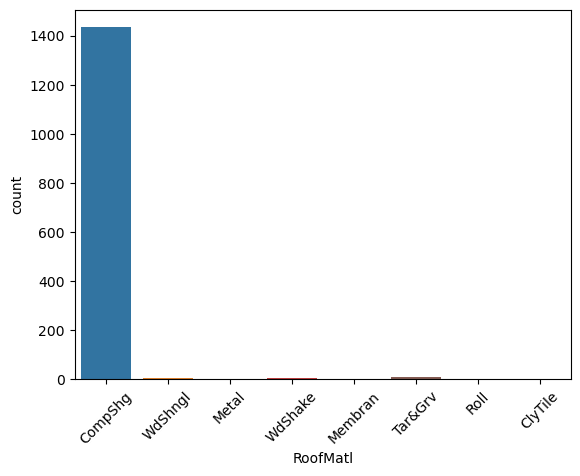

            MasVnrType      Ratio
MasVnrType                       
BrkFace           1088  74.520548
Stone              340  23.287671
BrkCmn              32   2.191781
##########################################


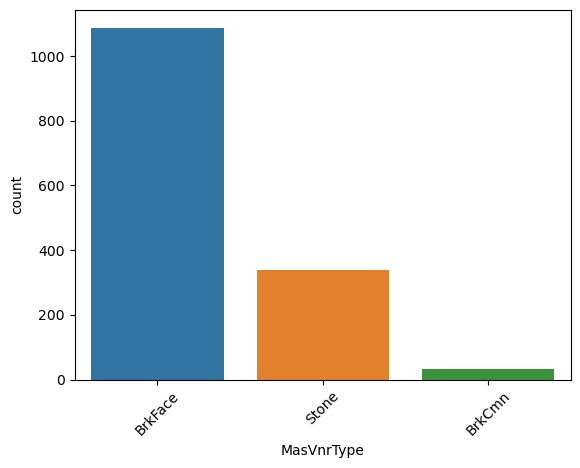

           ExterQual      Ratio
ExterQual                      
TA               906  62.054795
Gd               488  33.424658
Ex                52   3.561644
Fa                14   0.958904
##########################################


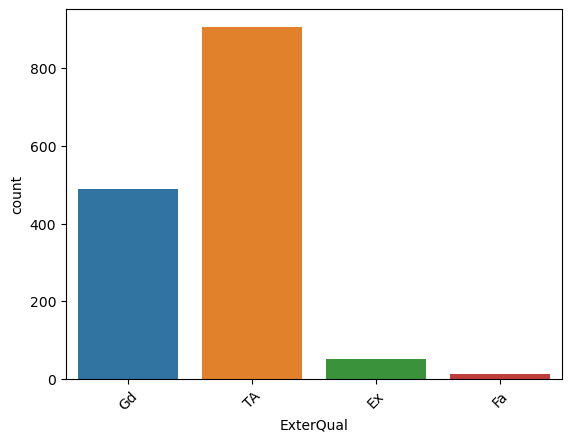

           ExterCond      Ratio
ExterCond                      
TA              1282  87.808219
Gd               146  10.000000
Fa                28   1.917808
Ex                 3   0.205479
Po                 1   0.068493
##########################################


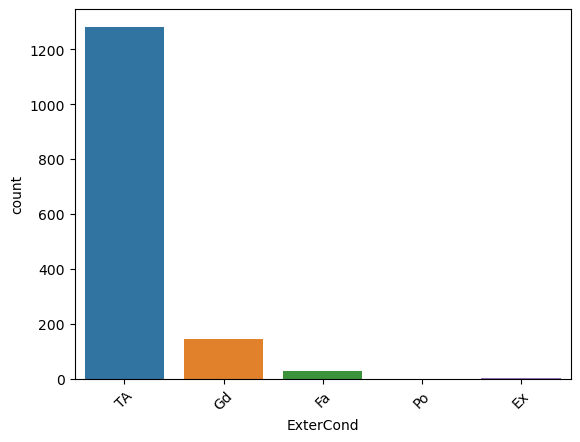

            Foundation      Ratio
Foundation                       
PConc              647  44.315068
CBlock             634  43.424658
BrkTil             146  10.000000
Slab                24   1.643836
Stone                6   0.410959
Wood                 3   0.205479
##########################################


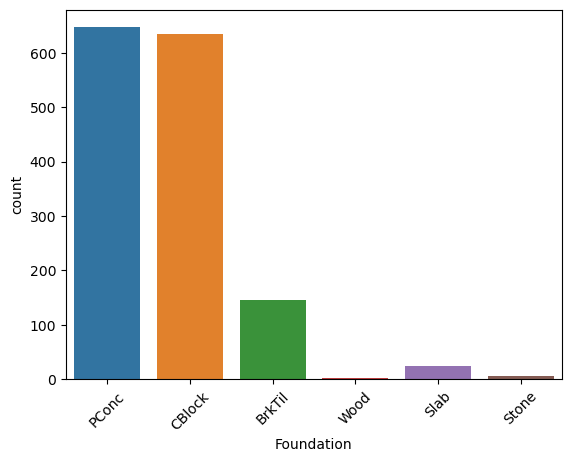

          BsmtQual      Ratio
BsmtQual                     
TA             663  45.410959
Gd             633  43.356164
Ex             128   8.767123
Fa              36   2.465753
##########################################


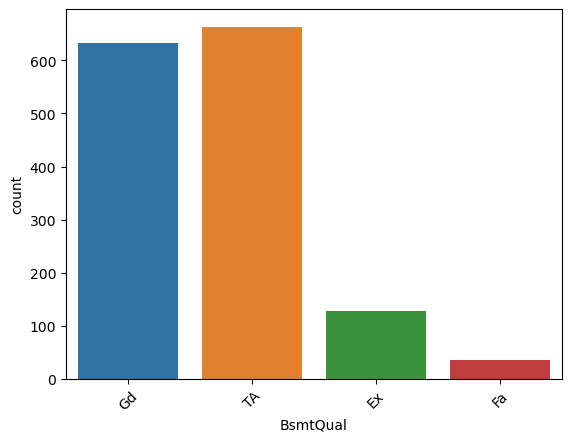

          BsmtCond      Ratio
BsmtCond                     
TA            1343  91.986301
Gd              68   4.657534
Fa              47   3.219178
Po               2   0.136986
##########################################


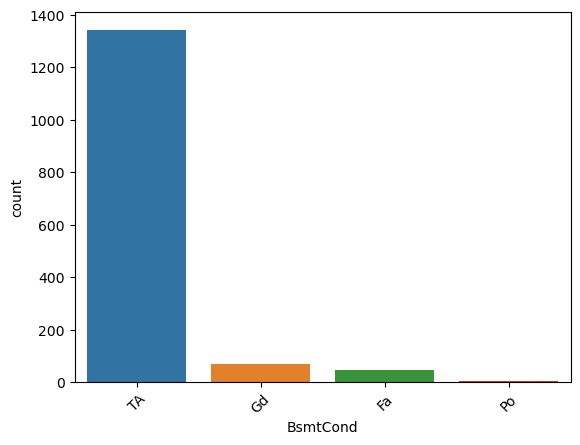

              BsmtExposure      Ratio
BsmtExposure                         
No                     979  67.054795
Av                     226  15.479452
Gd                     139   9.520548
Mn                     116   7.945205
##########################################


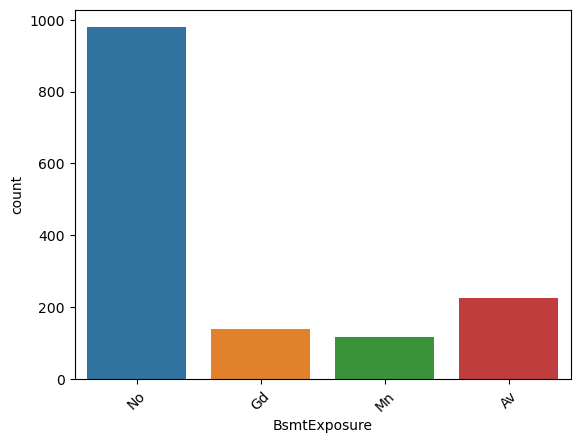

              BsmtFinType1      Ratio
BsmtFinType1                         
Unf                    442  30.273973
GLQ                    430  29.452055
ALQ                    223  15.273973
BLQ                    150  10.273973
Rec                    140   9.589041
LwQ                     75   5.136986
##########################################


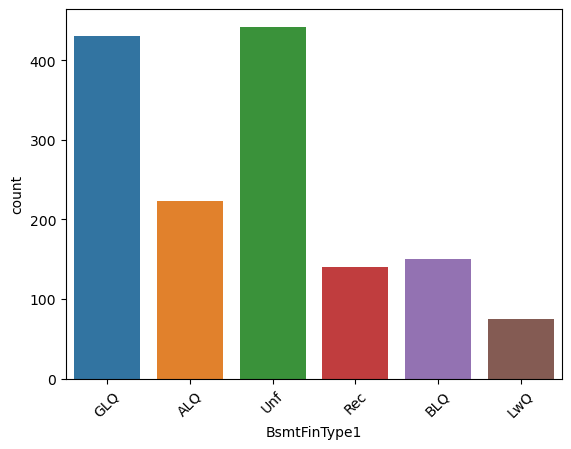

              BsmtFinType2      Ratio
BsmtFinType2                         
Unf                   1292  88.493151
Rec                     54   3.698630
LwQ                     47   3.219178
BLQ                     33   2.260274
ALQ                     20   1.369863
GLQ                     14   0.958904
##########################################


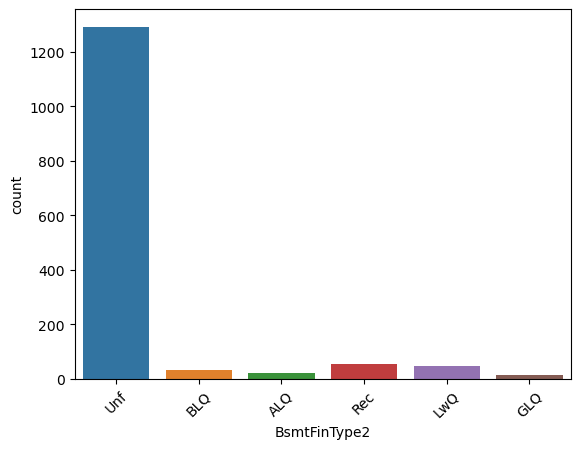

         Heating      Ratio
Heating                    
GasA        1428  97.808219
GasW          18   1.232877
Grav           7   0.479452
Wall           4   0.273973
OthW           2   0.136986
Floor          1   0.068493
##########################################


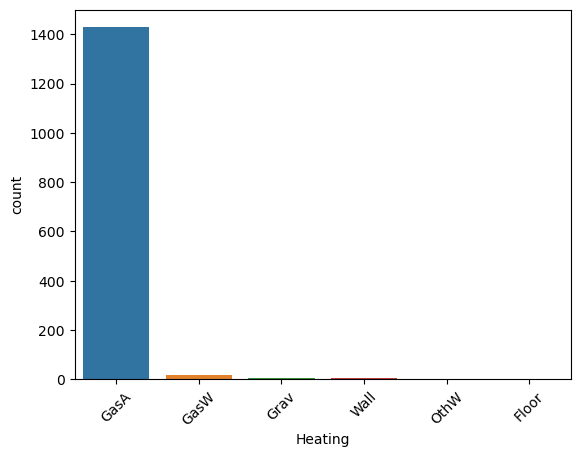

           HeatingQC      Ratio
HeatingQC                      
Ex               741  50.753425
TA               428  29.315068
Gd               241  16.506849
Fa                49   3.356164
Po                 1   0.068493
##########################################


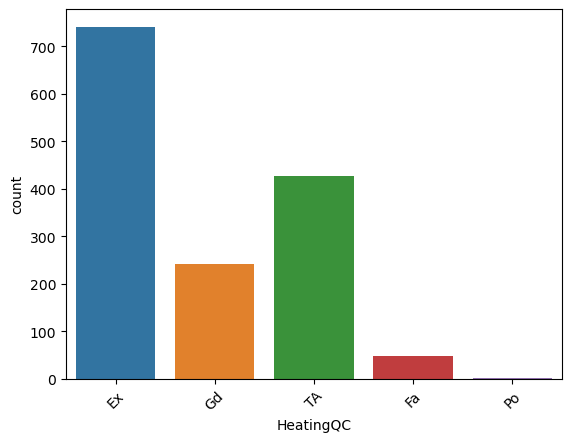

            CentralAir      Ratio
CentralAir                       
Y                 1365  93.493151
N                   95   6.506849
##########################################


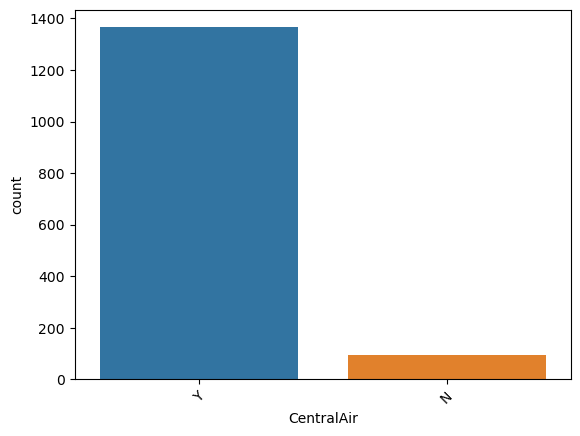

            Electrical      Ratio
Electrical                       
SBrkr             1334  91.369863
FuseA               94   6.438356
FuseF               28   1.917808
FuseP                3   0.205479
Mix                  1   0.068493
##########################################


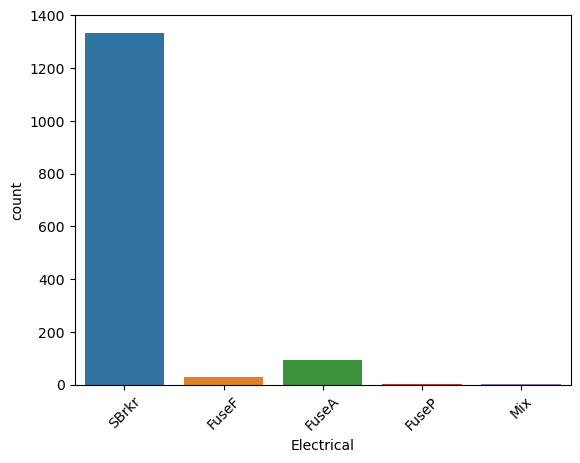

             KitchenQual      Ratio
KitchenQual                        
TA                   735  50.342466
Gd                   586  40.136986
Ex                   100   6.849315
Fa                    39   2.671233
##########################################


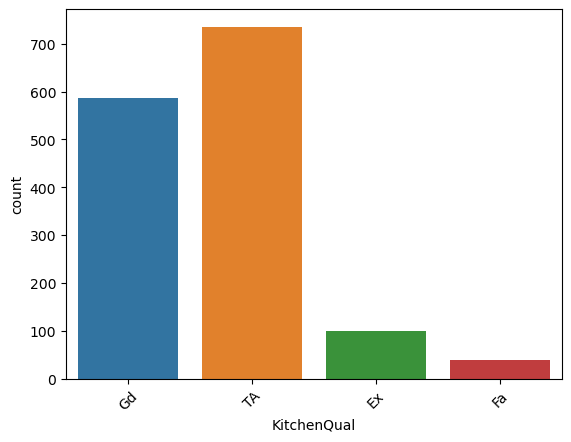

            Functional      Ratio
Functional                       
Typ               1360  93.150685
Min2                34   2.328767
Min1                31   2.123288
Mod                 15   1.027397
Maj1                14   0.958904
Maj2                 5   0.342466
Sev                  1   0.068493
##########################################


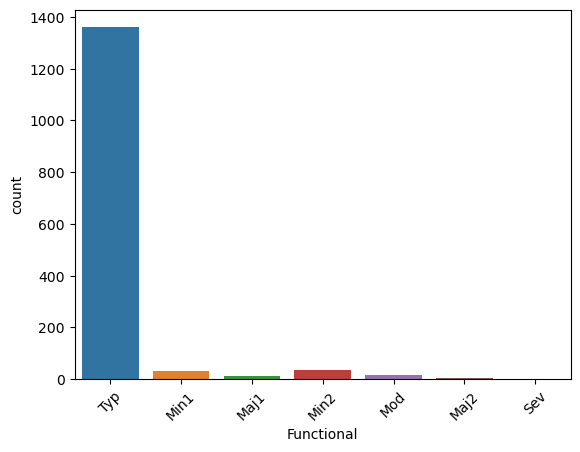

             FireplaceQu      Ratio
FireplaceQu                        
Gd                   720  49.315068
TA                   588  40.273973
Fa                    57   3.904110
Ex                    52   3.561644
Po                    43   2.945205
##########################################


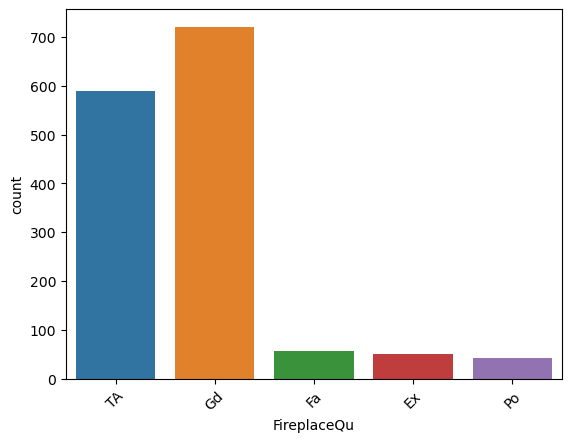

            GarageType      Ratio
GarageType                       
Attchd             921  63.082192
Detchd             412  28.219178
BuiltIn             92   6.301370
Basment             20   1.369863
CarPort              9   0.616438
2Types               6   0.410959
##########################################


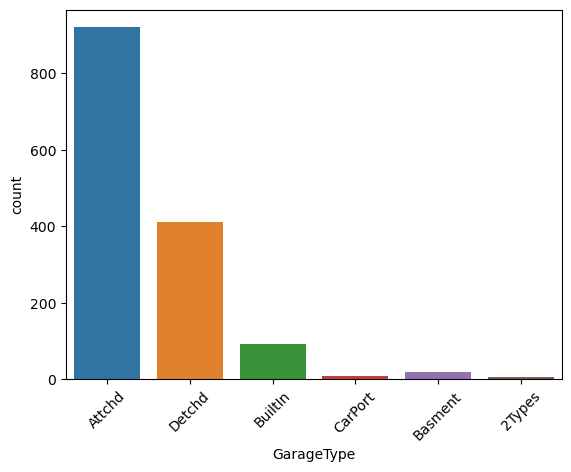

              GarageFinish      Ratio
GarageFinish                         
Unf                    644  44.109589
RFn                    445  30.479452
Fin                    371  25.410959
##########################################


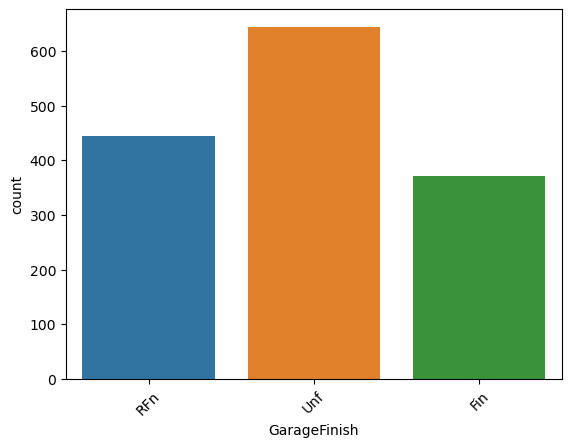

            GarageQual      Ratio
GarageQual                       
TA                1387  95.000000
Fa                  52   3.561644
Gd                  15   1.027397
Ex                   3   0.205479
Po                   3   0.205479
##########################################


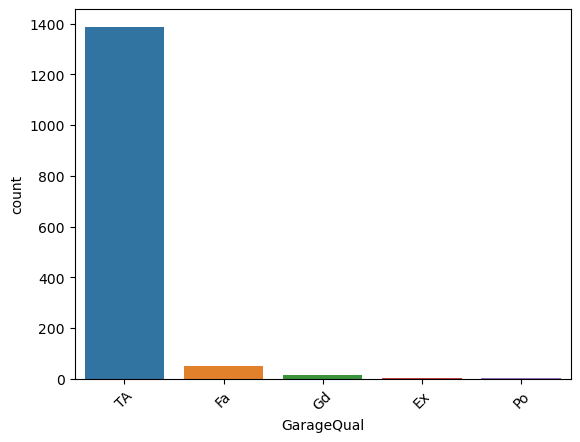

            GarageCond      Ratio
GarageCond                       
TA                1406  96.301370
Fa                  36   2.465753
Gd                   9   0.616438
Po                   7   0.479452
Ex                   2   0.136986
##########################################


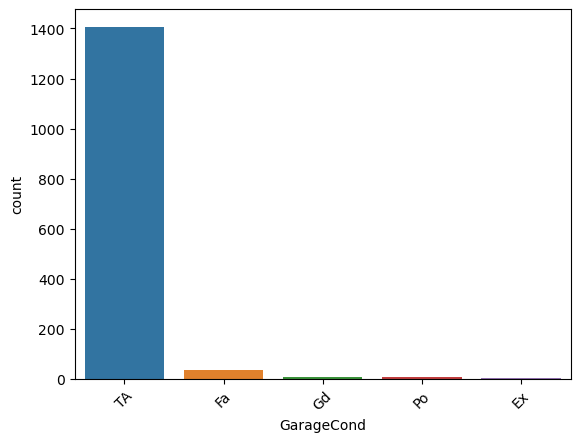

            PavedDrive      Ratio
PavedDrive                       
Y                 1340  91.780822
N                   90   6.164384
P                   30   2.054795
##########################################


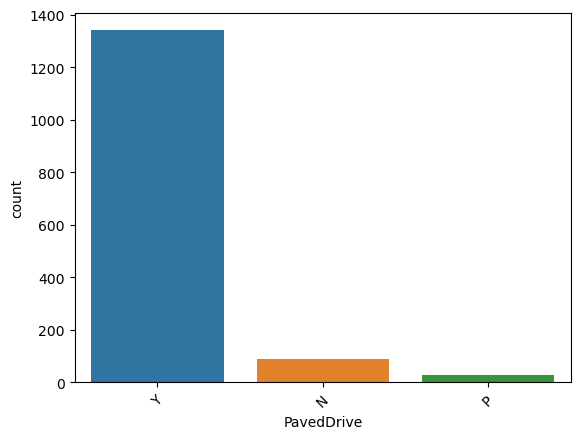

          SaleType      Ratio
SaleType                     
WD            1267  86.780822
New            122   8.356164
COD             43   2.945205
ConLD            9   0.616438
ConLI            5   0.342466
ConLw            5   0.342466
CWD              4   0.273973
Oth              3   0.205479
Con              2   0.136986
##########################################


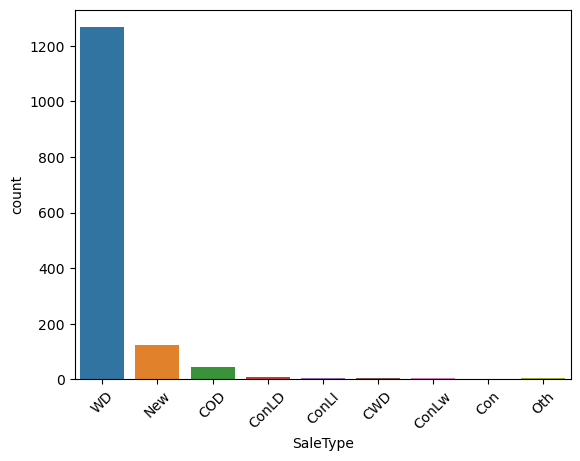

               SaleCondition      Ratio
SaleCondition                          
Normal                  1198  82.054795
Partial                  125   8.561644
Abnorml                  101   6.917808
Family                    20   1.369863
Alloca                    12   0.821918
AdjLand                    4   0.273973
##########################################


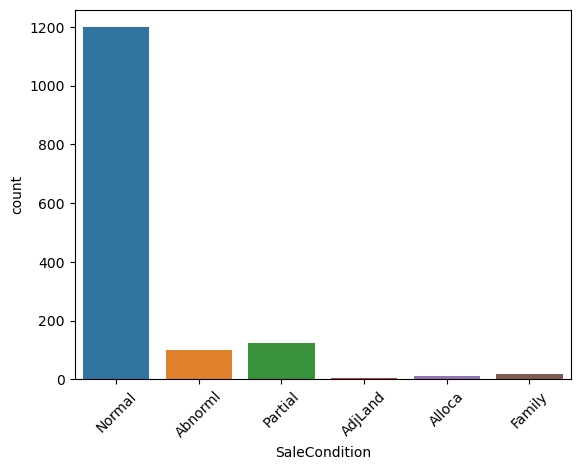

In [43]:
# DATA Visualization:

cat_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() <= 10]
num_cols = [col for col in df.columns if df[col].dtypes != "O"]



def cat_summary(df,col,plot=False):
    print(pd.DataFrame({col:df[col].value_counts(),
                       "Ratio":100*df[col].value_counts()/len(df)}))
    print("##########################################")
    if plot:
        sns.countplot(x=col,data=df)
        plt.xticks(rotation=45)
        plt.show()

for i in cat_cols:
    cat_summary(df,i,plot=True)

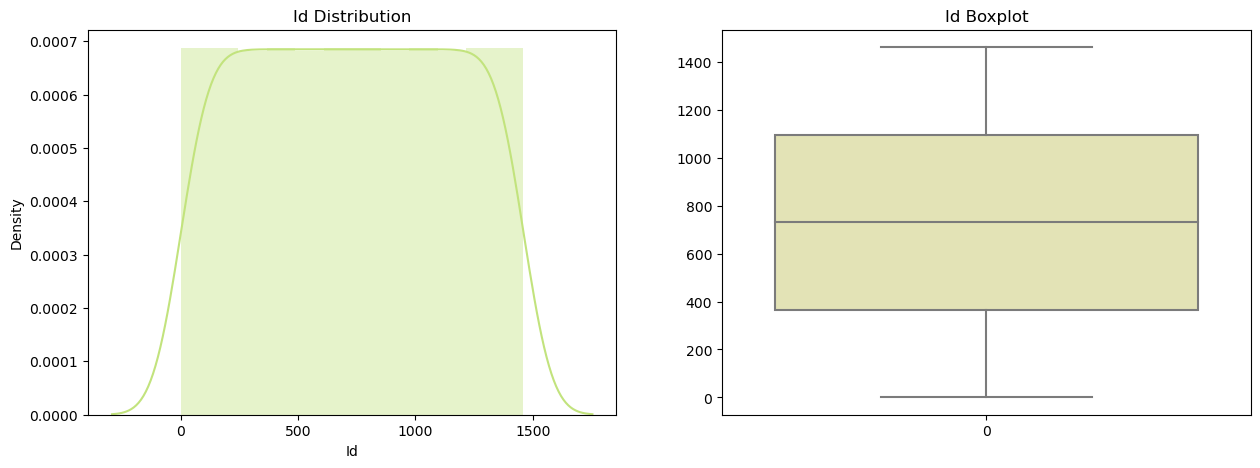

count    1460.000000
mean      730.500000
std       421.610009
min         1.000000
25%       365.750000
50%       730.500000
75%      1095.250000
max      1460.000000
Name: Id, dtype: float64
Skewness: 0.000000
Kurtosis: -1.200000
****************************


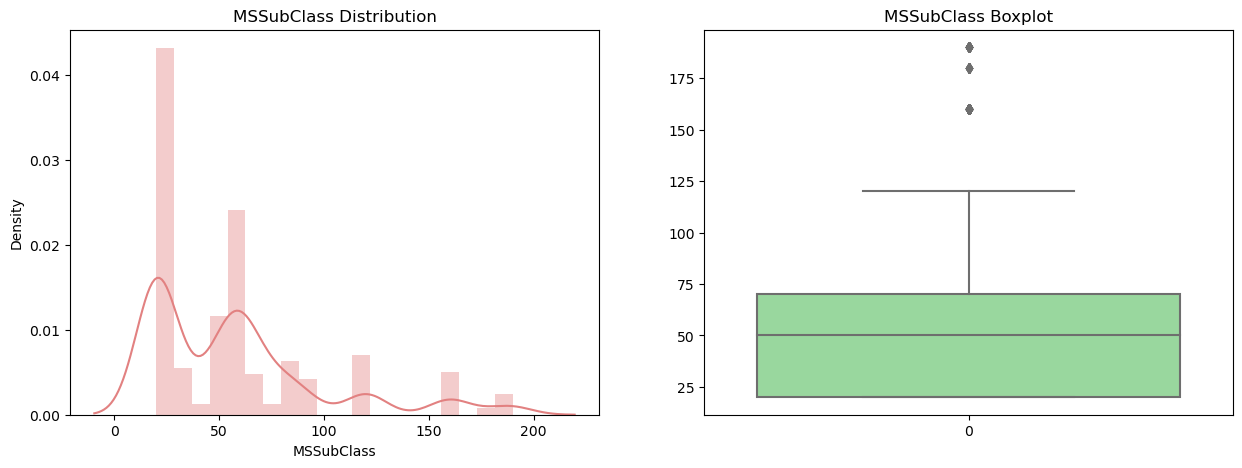

count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64
Skewness: 1.407657
Kurtosis: 1.580188
****************************


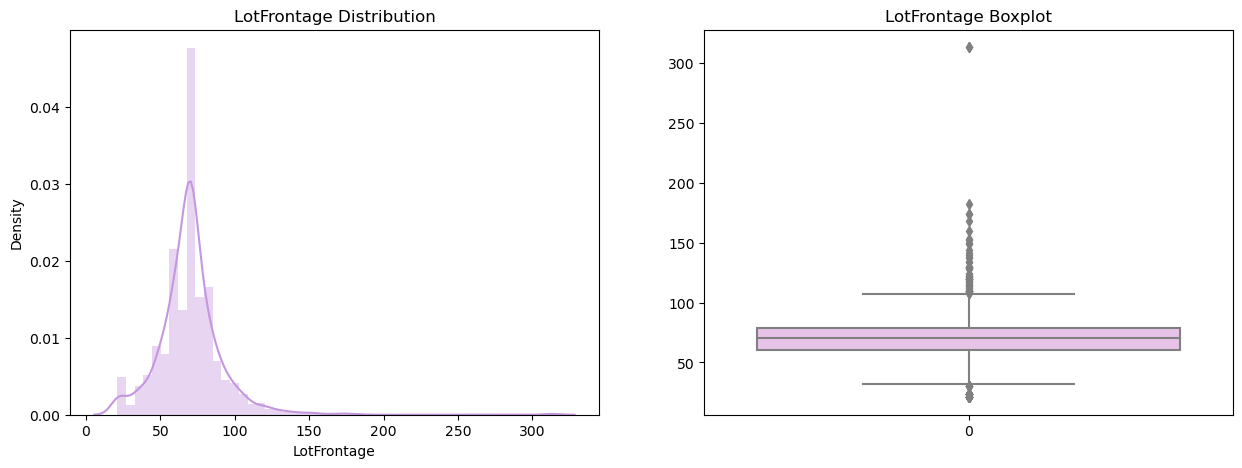

count    1460.000000
mean       70.049958
std        22.024023
min        21.000000
25%        60.000000
50%        70.049958
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64
Skewness: 2.384950
Kurtosis: 21.848165
****************************


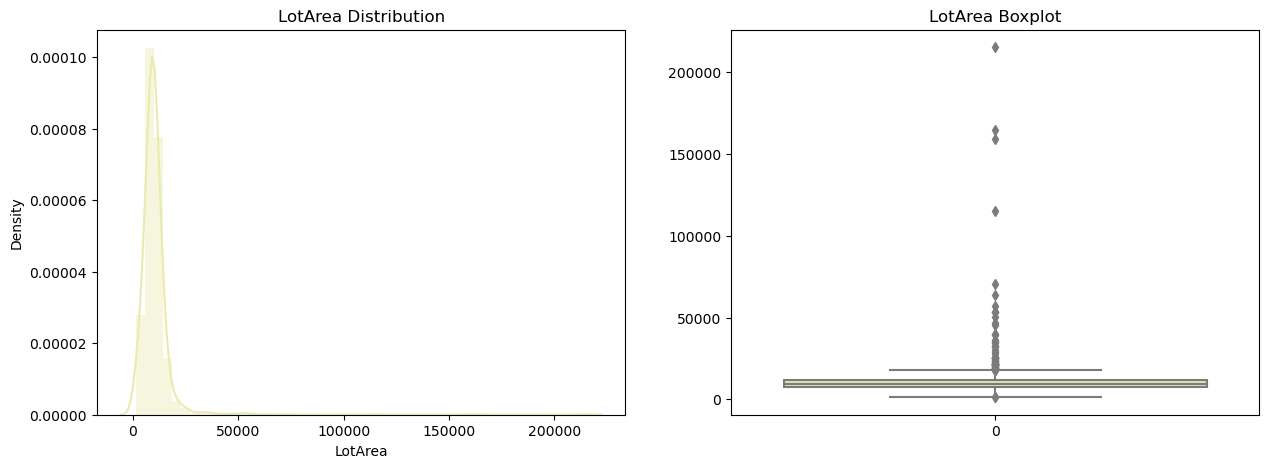

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64
Skewness: 12.207688
Kurtosis: 203.243271
****************************


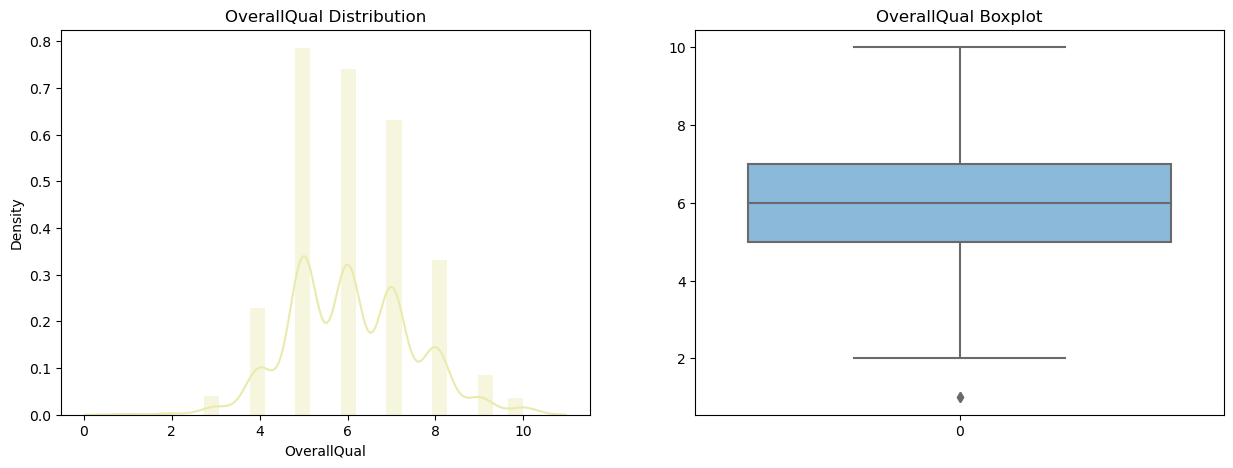

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64
Skewness: 0.216944
Kurtosis: 0.096293
****************************


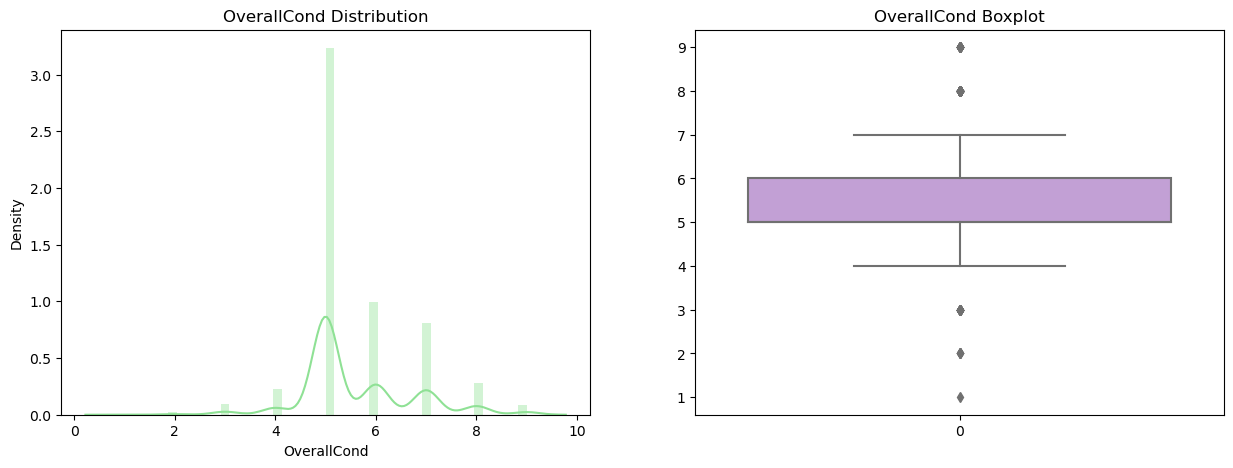

count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64
Skewness: 0.693067
Kurtosis: 1.106413
****************************


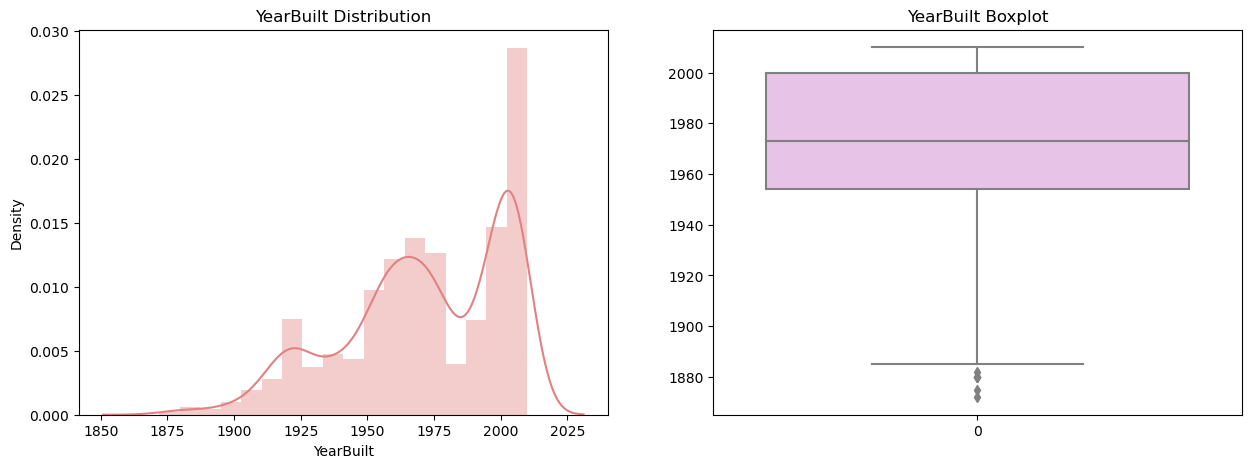

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64
Skewness: -0.613461
Kurtosis: -0.439552
****************************


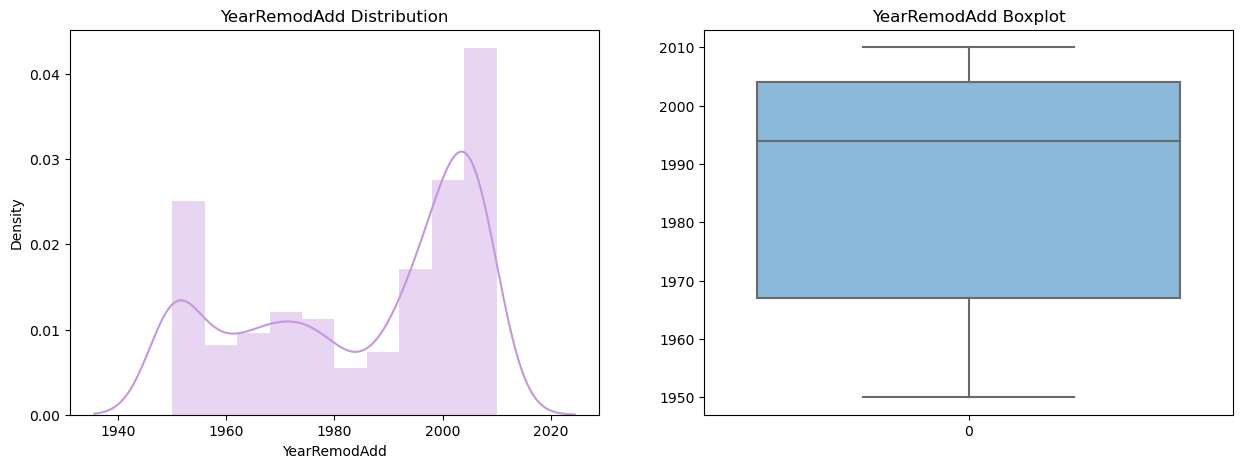

count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64
Skewness: -0.503562
Kurtosis: -1.272245
****************************


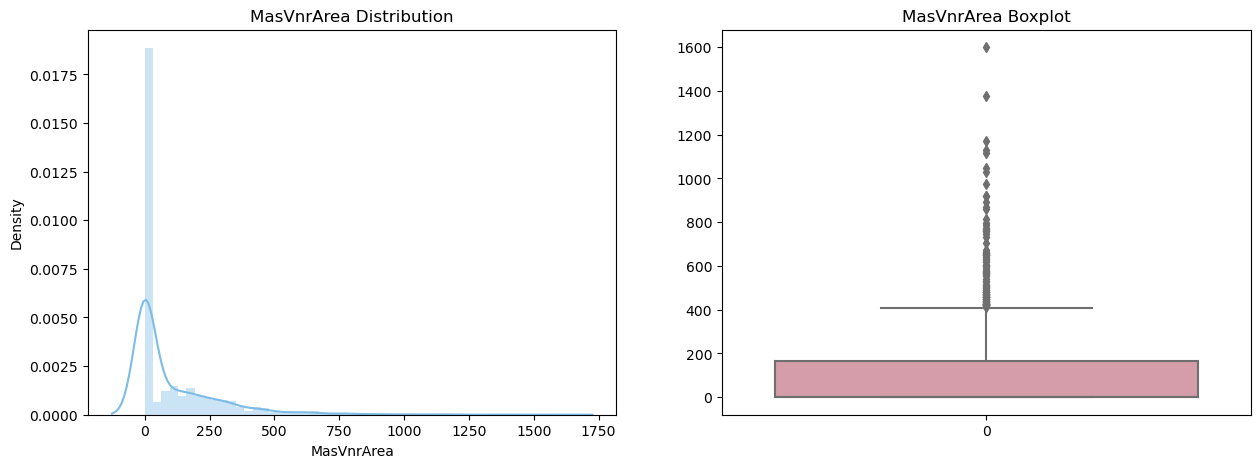

count    1460.000000
mean      103.685262
std       180.569112
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64
Skewness: 2.676412
Kurtosis: 10.154316
****************************


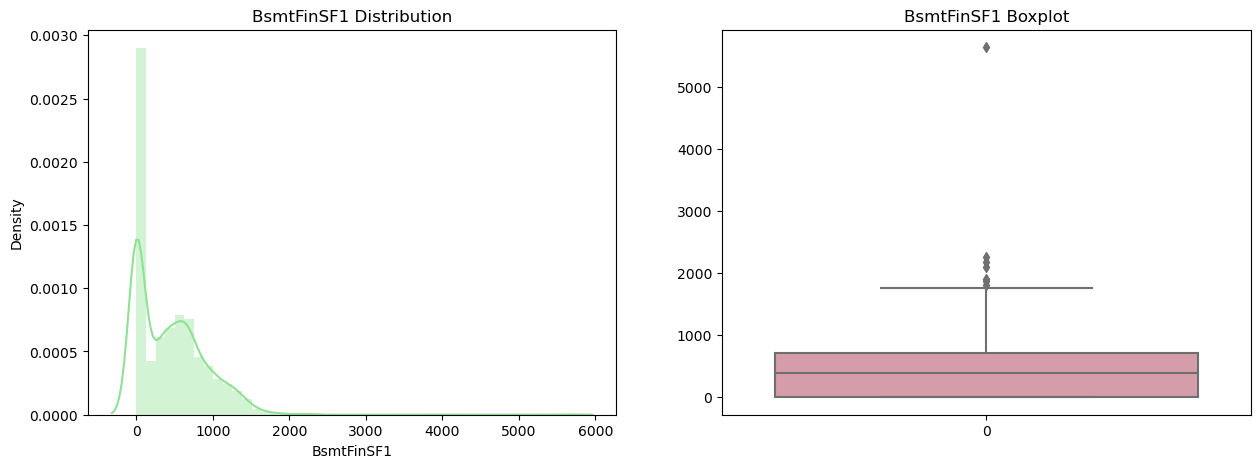

count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64
Skewness: 1.685503
Kurtosis: 11.118236
****************************


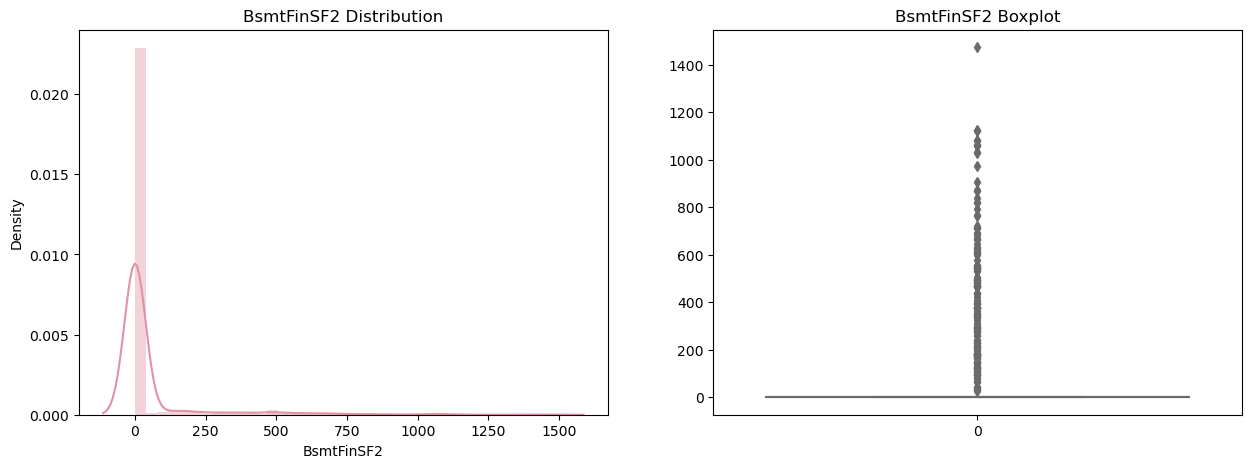

count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64
Skewness: 4.255261
Kurtosis: 20.113338
****************************


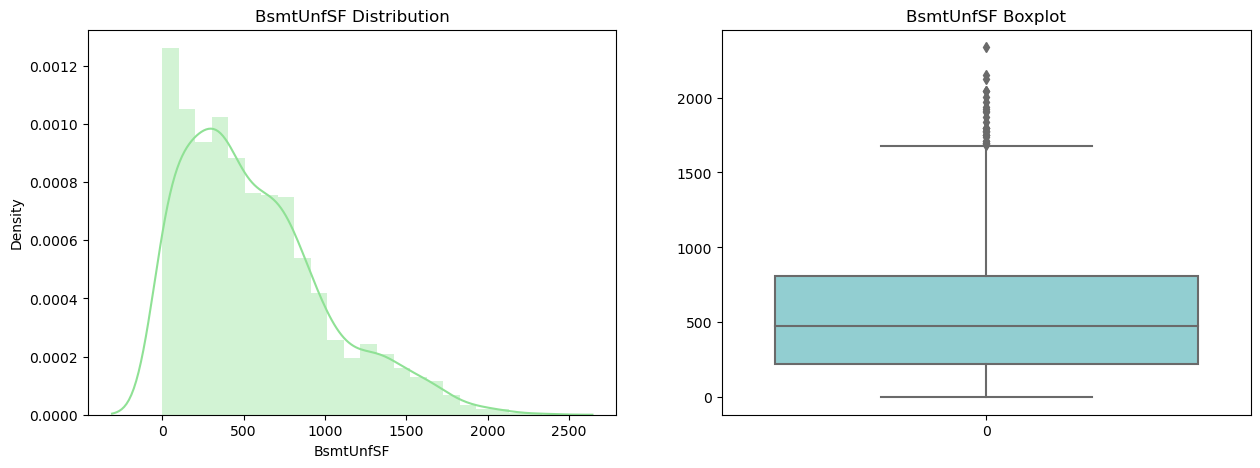

count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
25%       223.000000
50%       477.500000
75%       808.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64
Skewness: 0.920268
Kurtosis: 0.474994
****************************


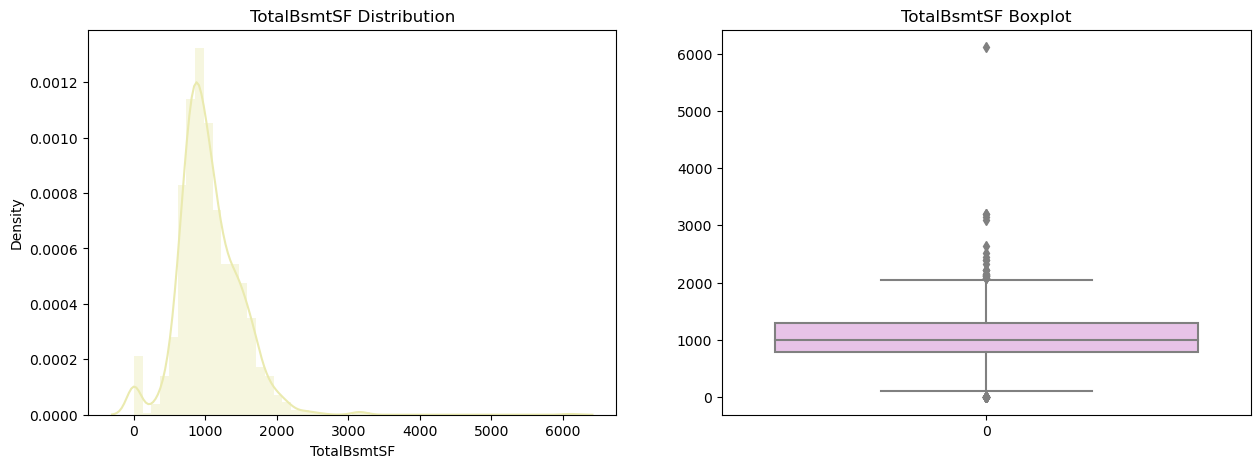

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64
Skewness: 1.524255
Kurtosis: 13.250483
****************************


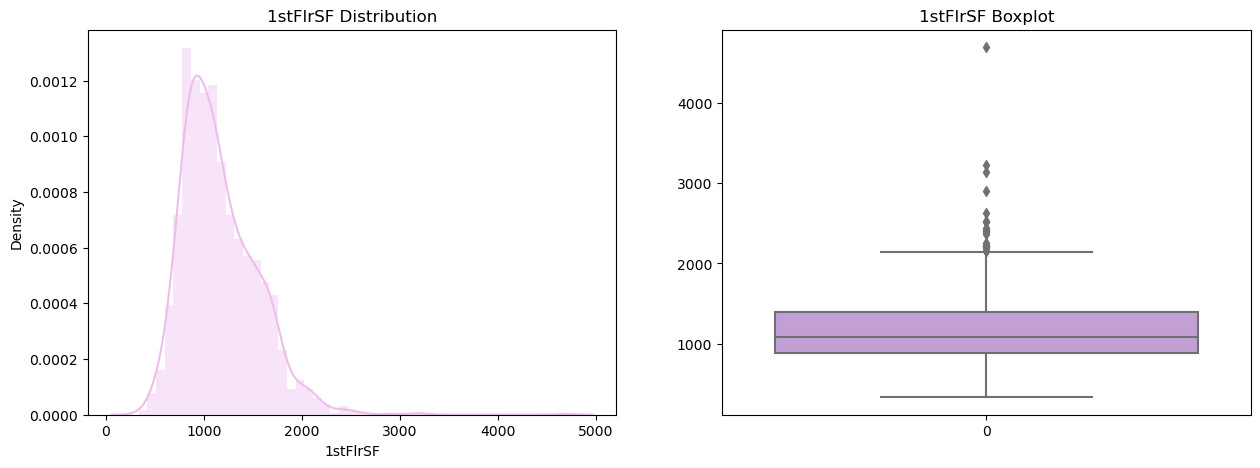

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64
Skewness: 1.376757
Kurtosis: 5.745841
****************************


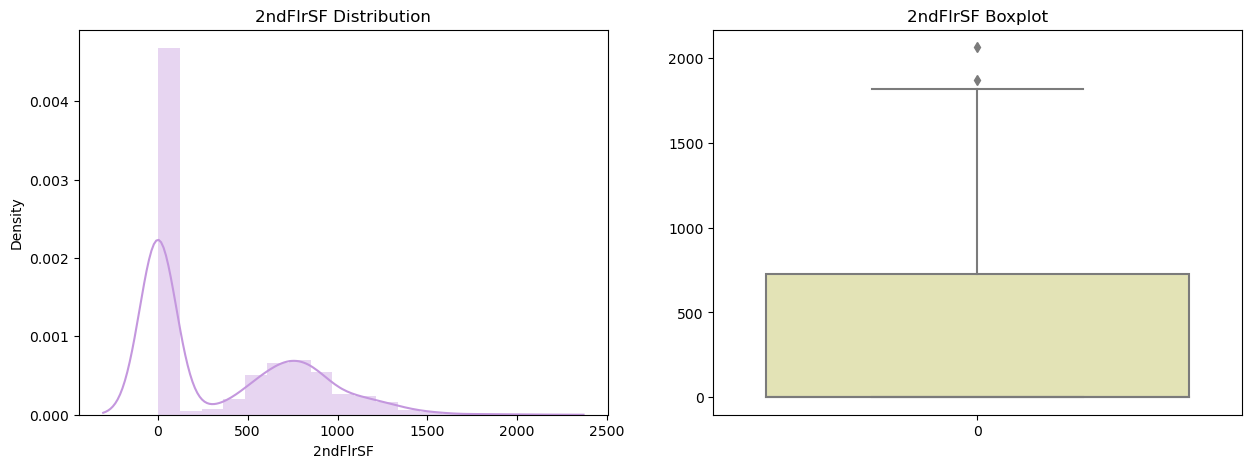

count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64
Skewness: 0.813030
Kurtosis: -0.553464
****************************


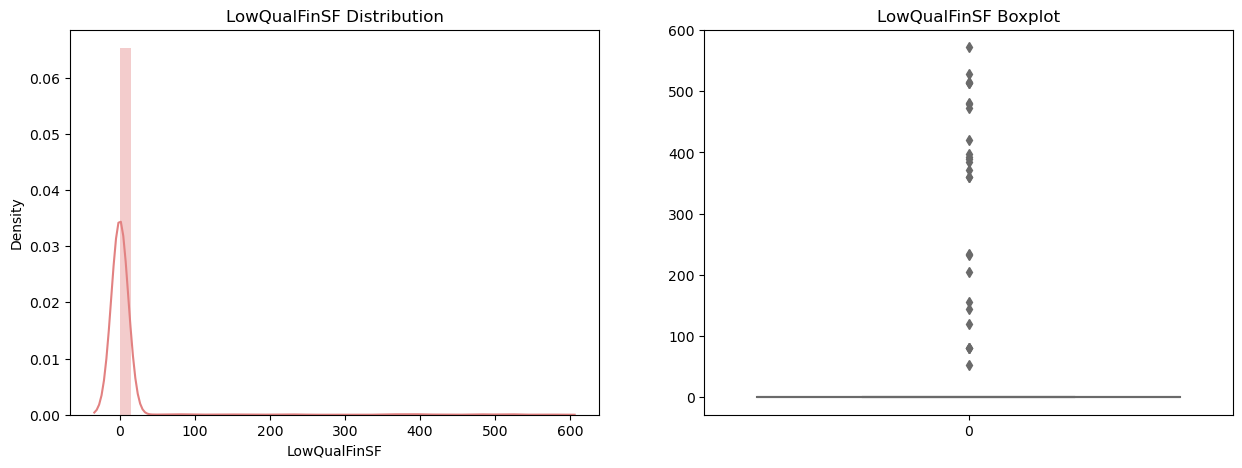

count    1460.000000
mean        5.844521
std        48.623081
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       572.000000
Name: LowQualFinSF, dtype: float64
Skewness: 9.011341
Kurtosis: 83.234817
****************************


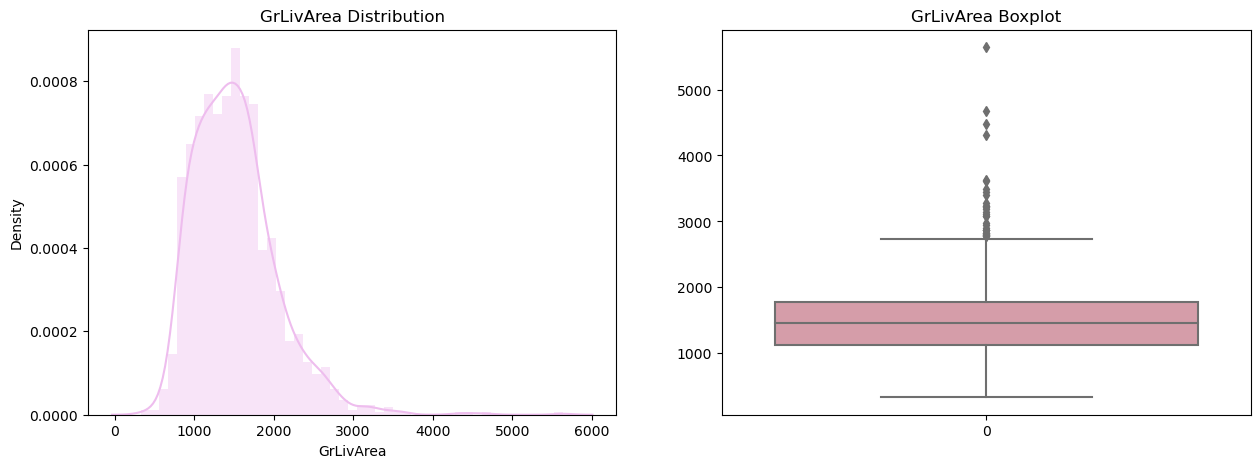

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64
Skewness: 1.366560
Kurtosis: 4.895121
****************************


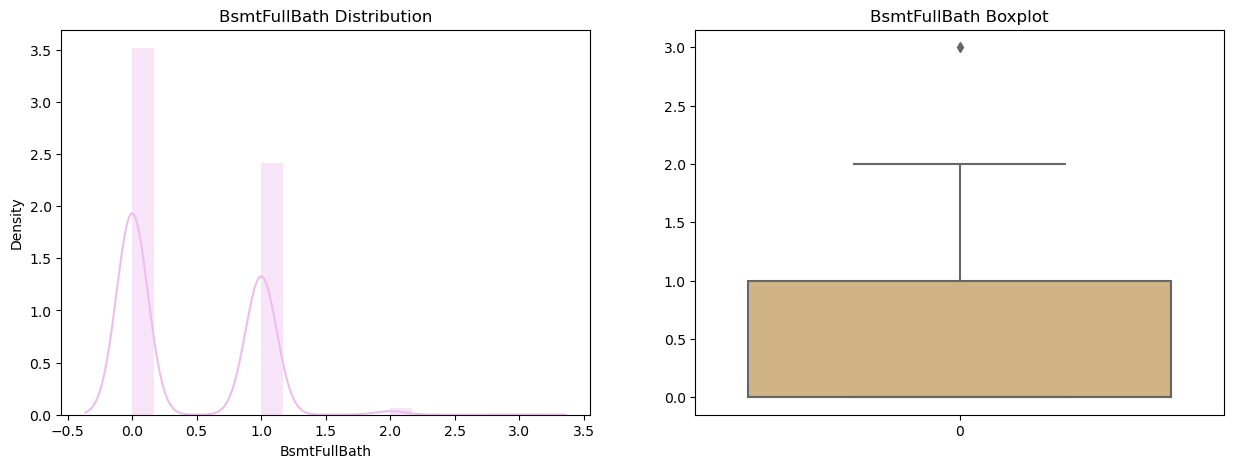

count    1460.000000
mean        0.425342
std         0.518911
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64
Skewness: 0.596067
Kurtosis: -0.839098
****************************


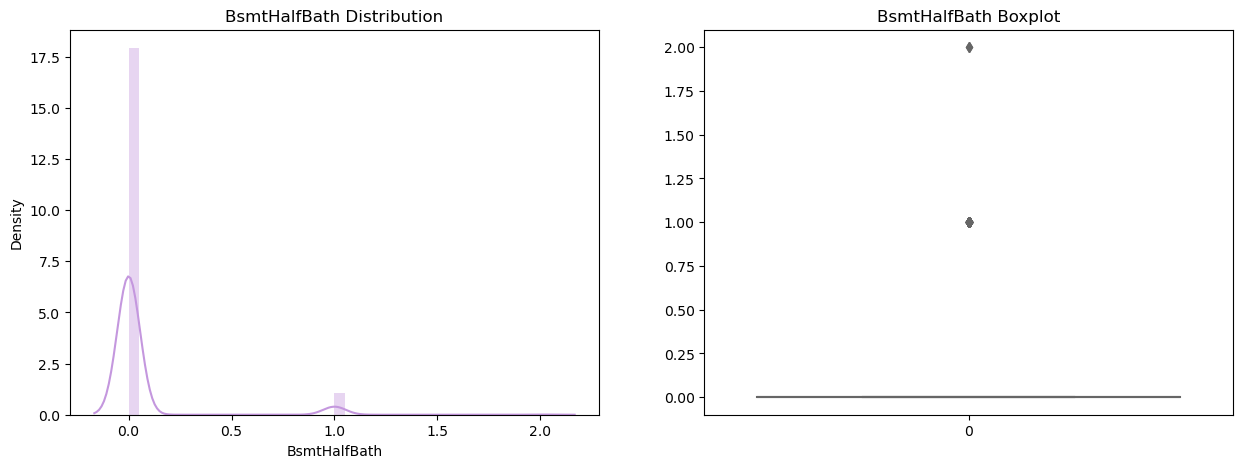

count    1460.000000
mean        0.057534
std         0.238753
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64
Skewness: 4.103403
Kurtosis: 16.396642
****************************


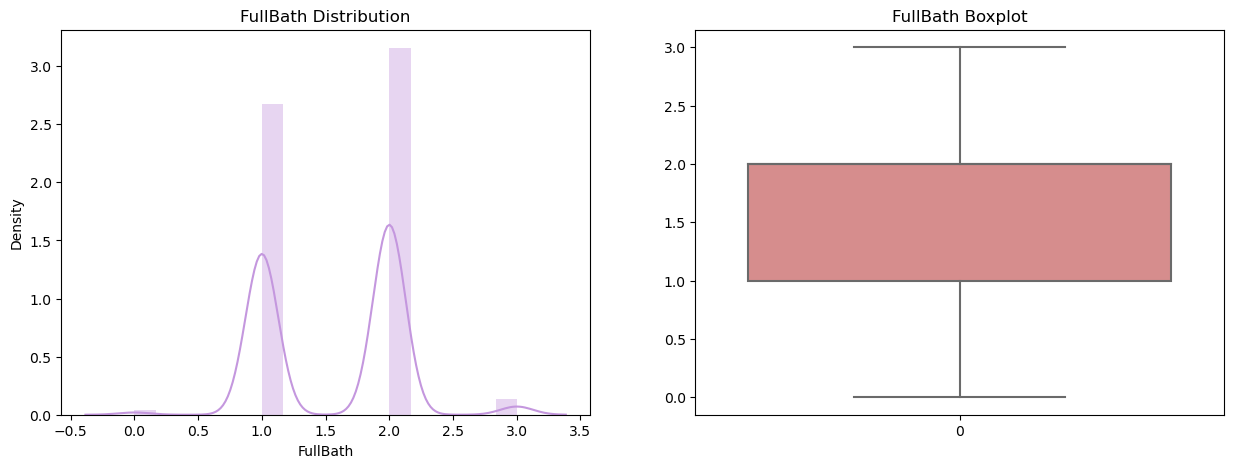

count    1460.000000
mean        1.565068
std         0.550916
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64
Skewness: 0.036562
Kurtosis: -0.857043
****************************


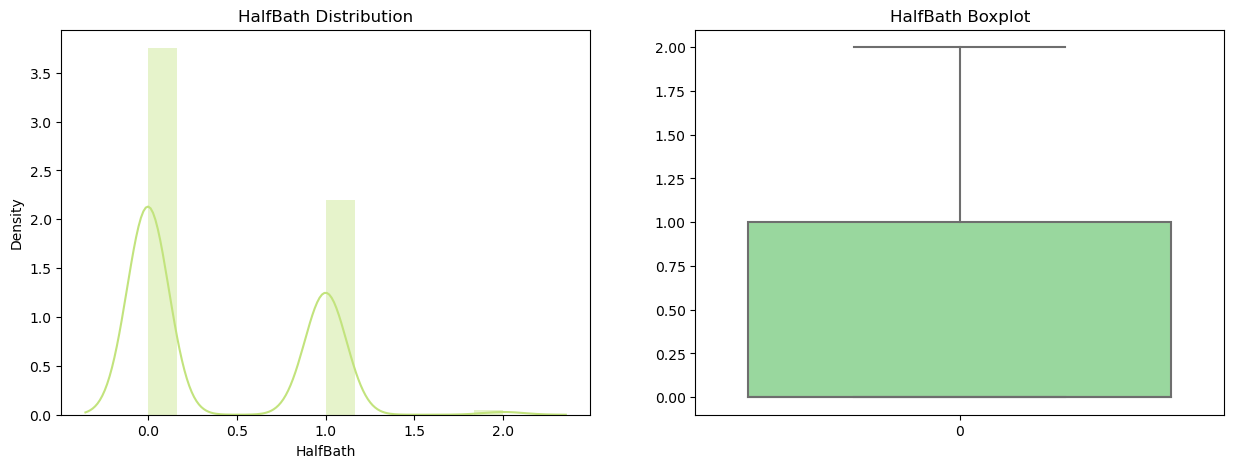

count    1460.000000
mean        0.382877
std         0.502885
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: HalfBath, dtype: float64
Skewness: 0.675897
Kurtosis: -1.076927
****************************


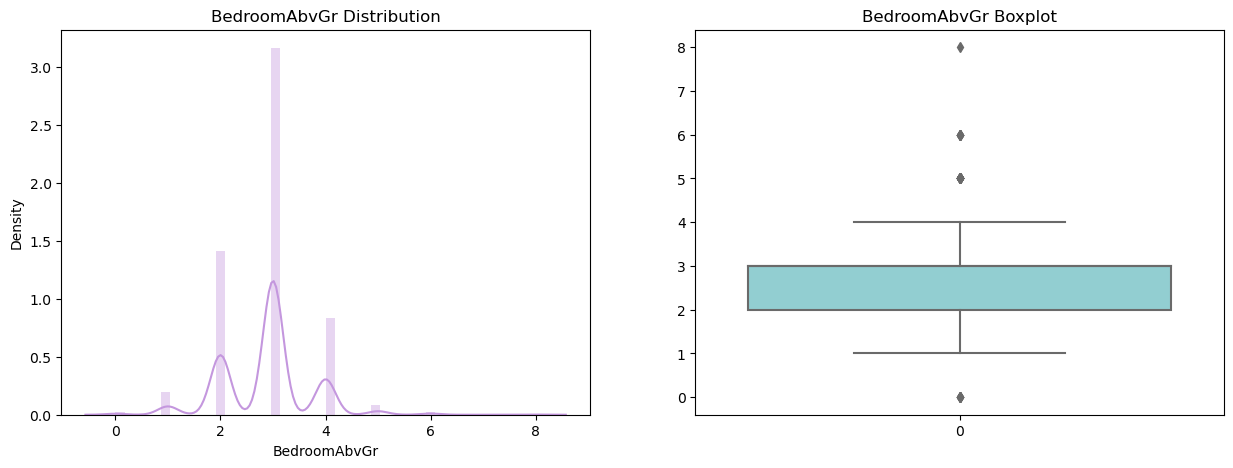

count    1460.000000
mean        2.866438
std         0.815778
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64
Skewness: 0.211790
Kurtosis: 2.230875
****************************


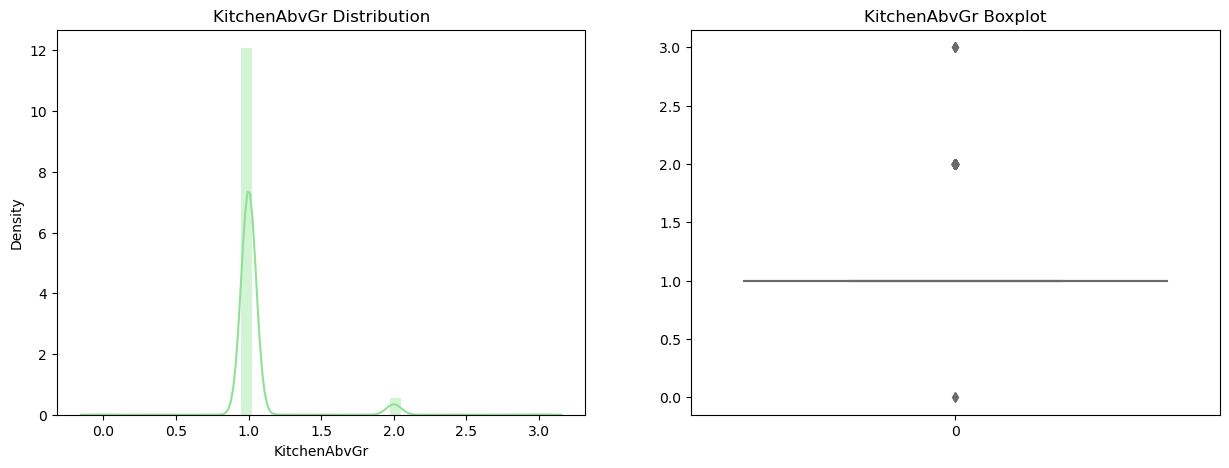

count    1460.000000
mean        1.046575
std         0.220338
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: KitchenAbvGr, dtype: float64
Skewness: 4.488397
Kurtosis: 21.532404
****************************


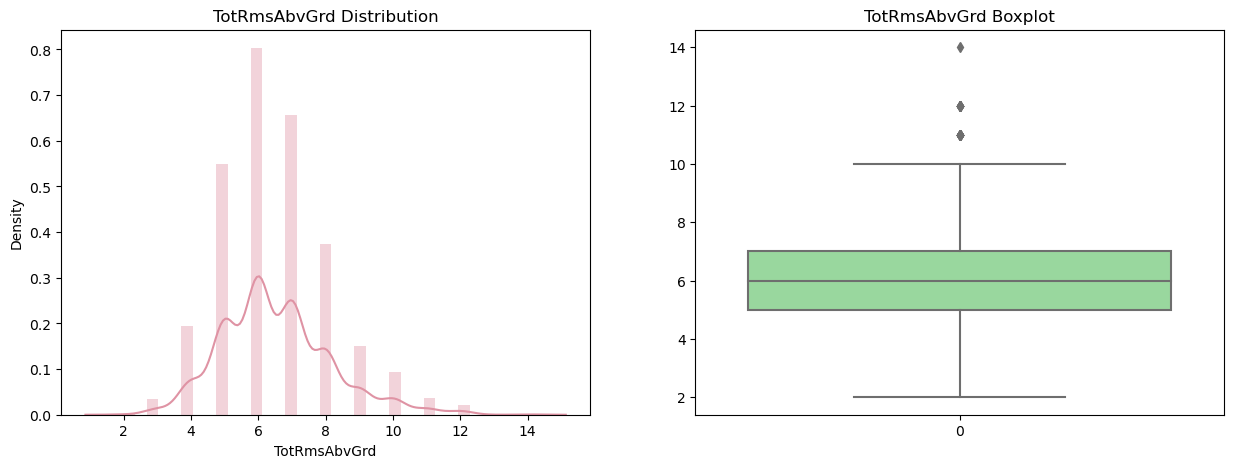

count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64
Skewness: 0.676341
Kurtosis: 0.880762
****************************


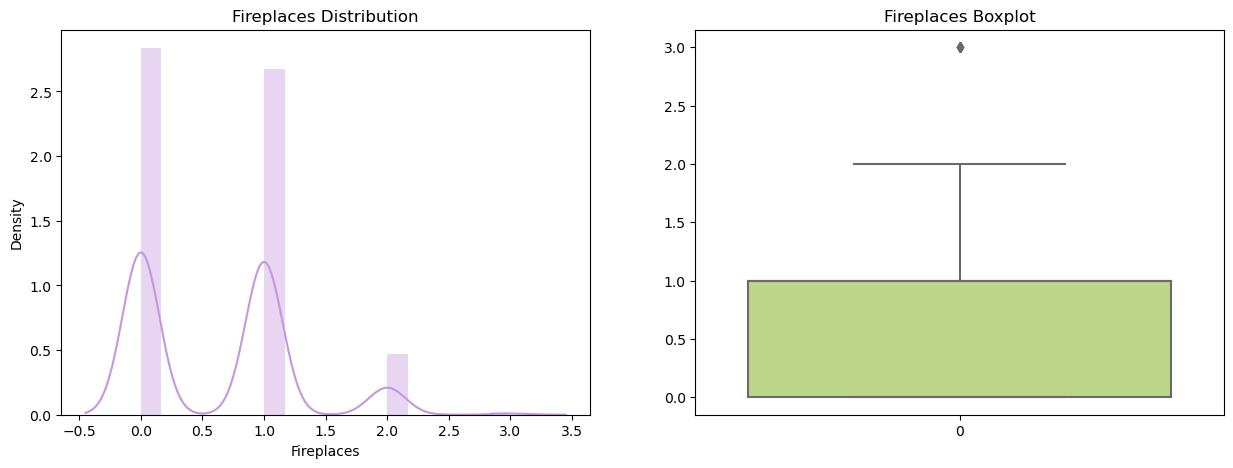

count    1460.000000
mean        0.613014
std         0.644666
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64
Skewness: 0.649565
Kurtosis: -0.217237
****************************


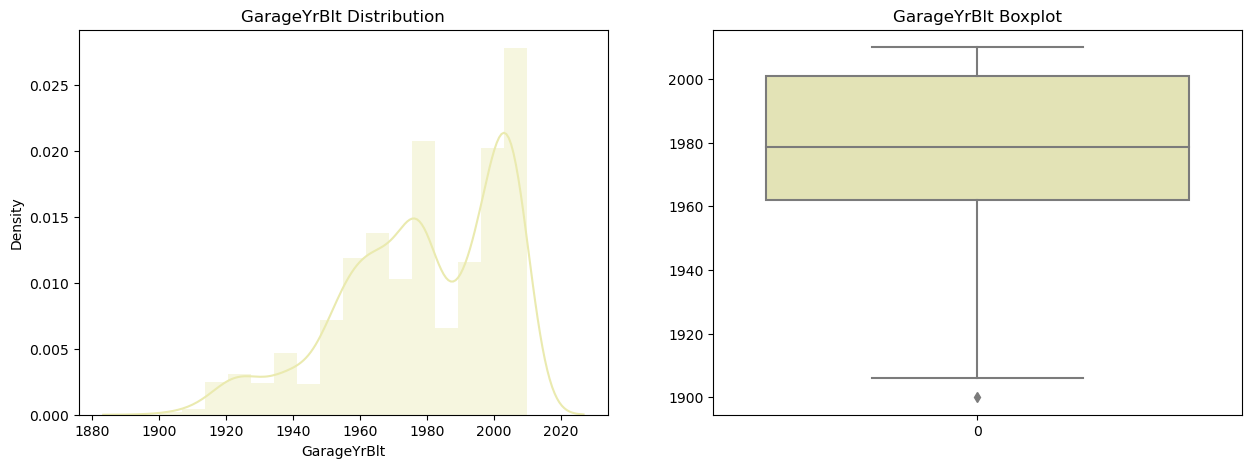

count    1460.000000
mean     1978.506164
std        23.994583
min      1900.000000
25%      1962.000000
50%      1978.506164
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64
Skewness: -0.668175
Kurtosis: -0.266503
****************************


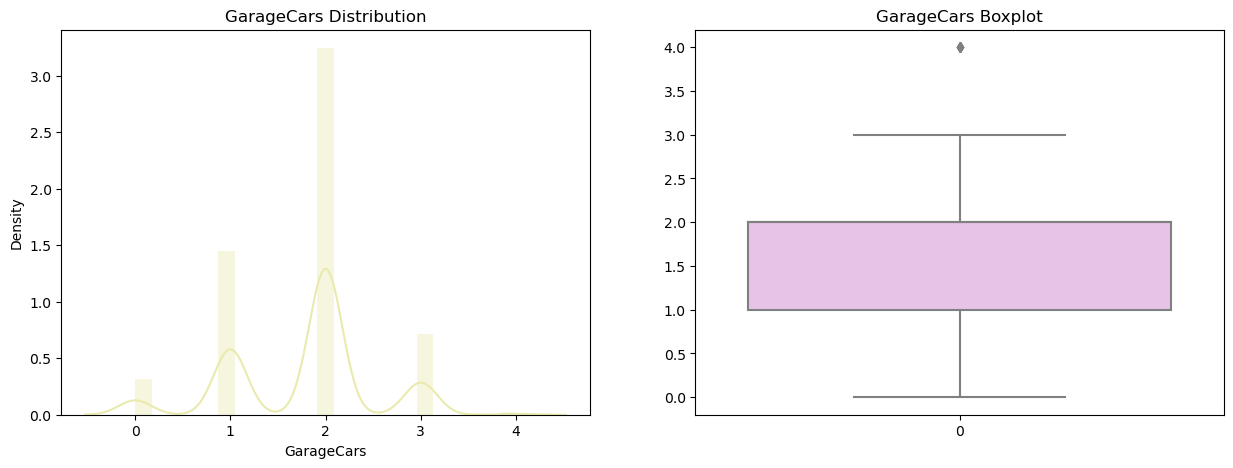

count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64
Skewness: -0.342549
Kurtosis: 0.220998
****************************


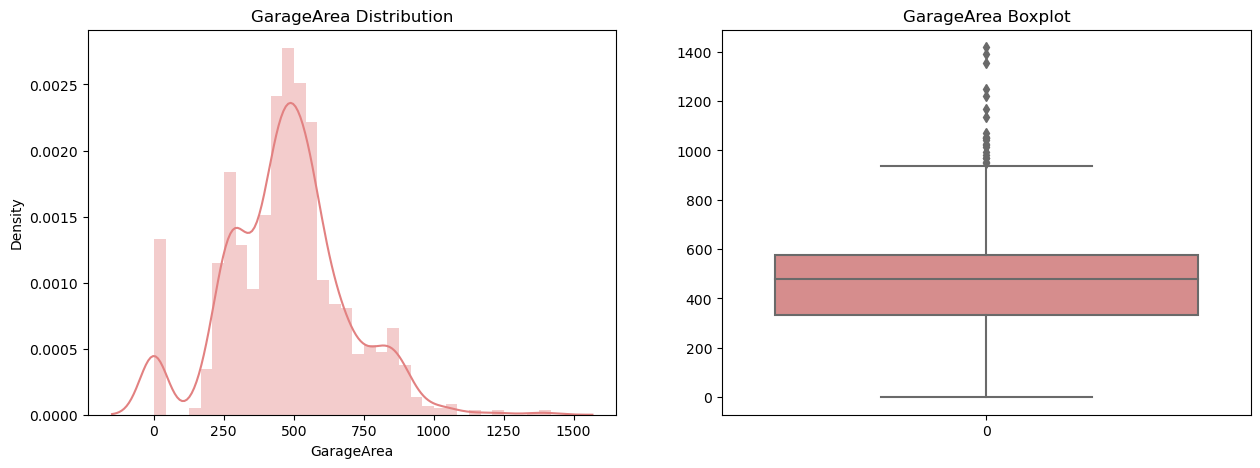

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64
Skewness: 0.179981
Kurtosis: 0.917067
****************************


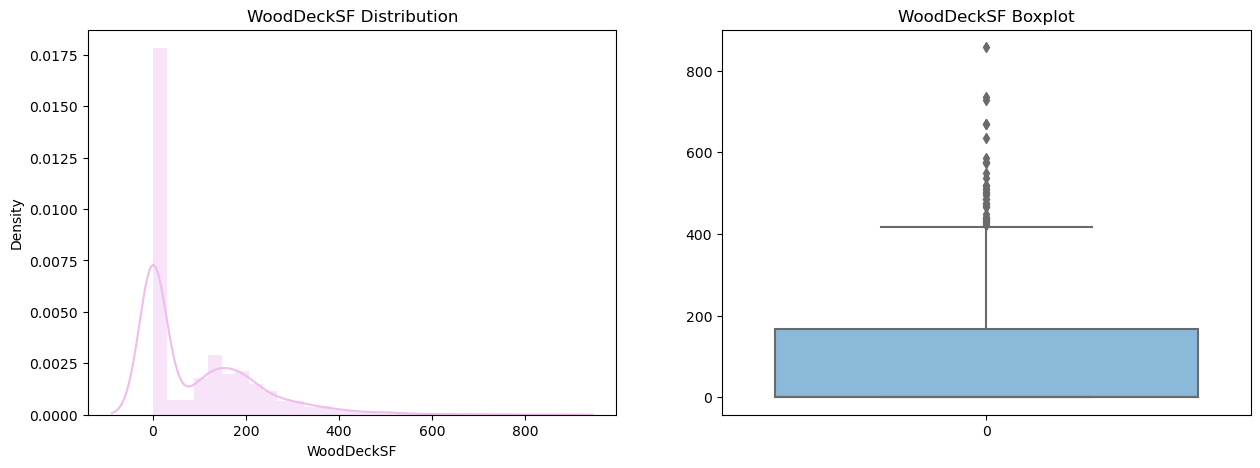

count    1460.000000
mean       94.244521
std       125.338794
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       857.000000
Name: WoodDeckSF, dtype: float64
Skewness: 1.541376
Kurtosis: 2.992951
****************************


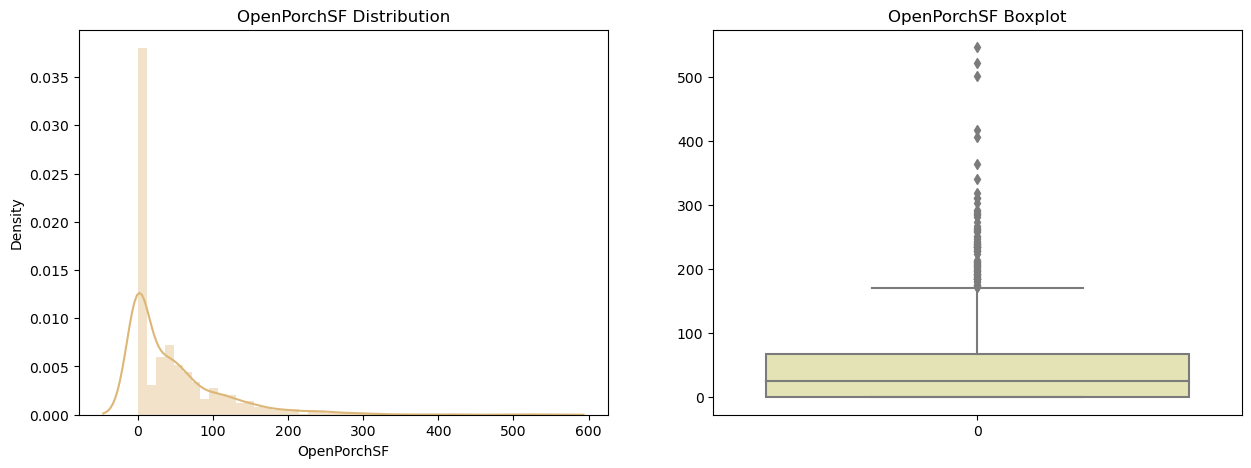

count    1460.000000
mean       46.660274
std        66.256028
min         0.000000
25%         0.000000
50%        25.000000
75%        68.000000
max       547.000000
Name: OpenPorchSF, dtype: float64
Skewness: 2.364342
Kurtosis: 8.490336
****************************


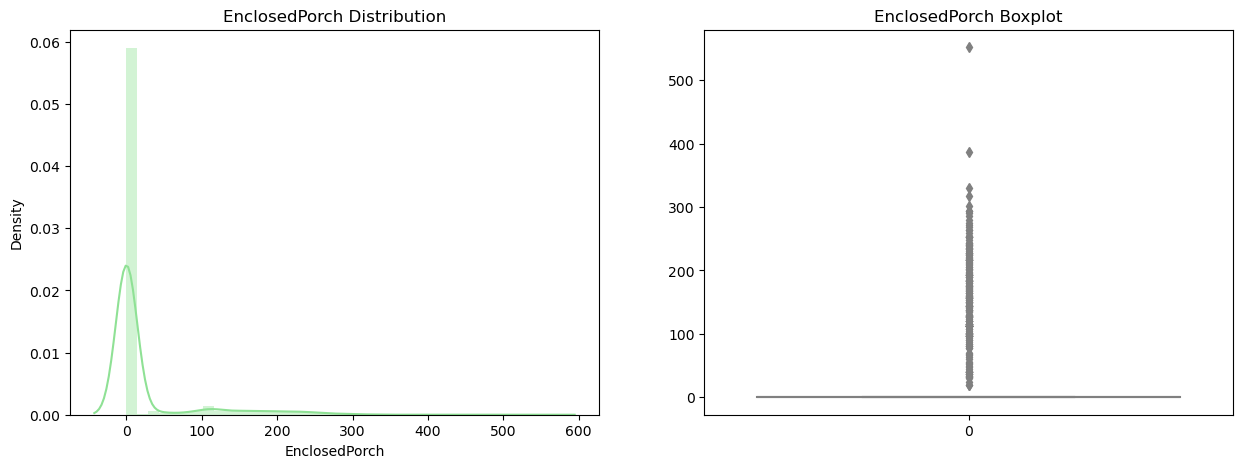

count    1460.000000
mean       21.954110
std        61.119149
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       552.000000
Name: EnclosedPorch, dtype: float64
Skewness: 3.089872
Kurtosis: 10.430766
****************************


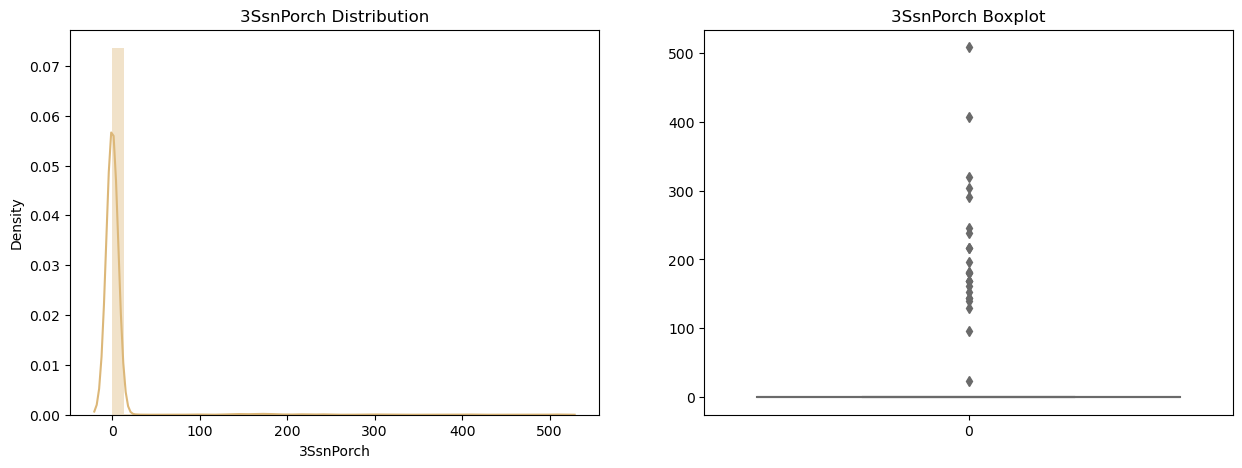

count    1460.000000
mean        3.409589
std        29.317331
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64
Skewness: 10.304342
Kurtosis: 123.662379
****************************


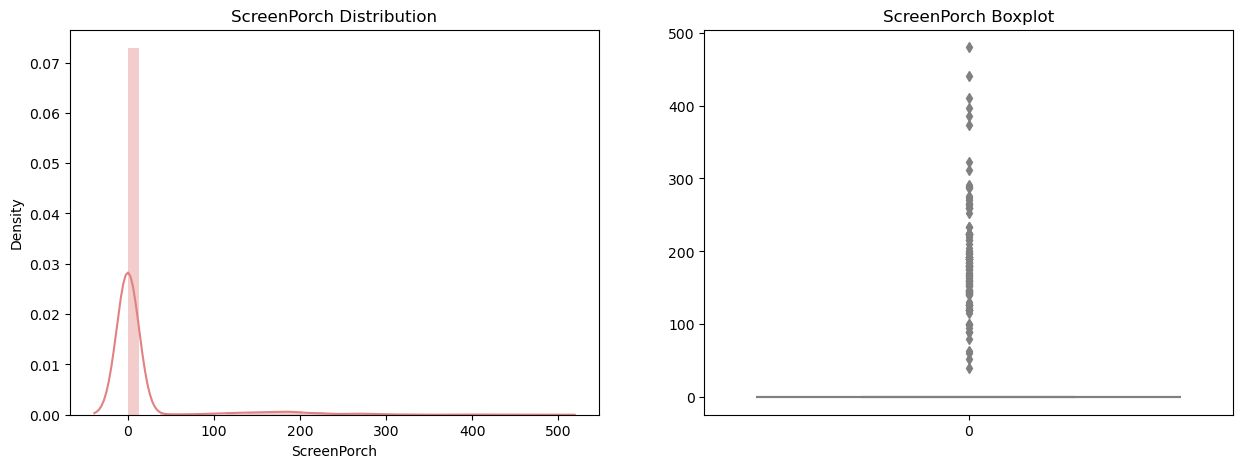

count    1460.000000
mean       15.060959
std        55.757415
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       480.000000
Name: ScreenPorch, dtype: float64
Skewness: 4.122214
Kurtosis: 18.439068
****************************


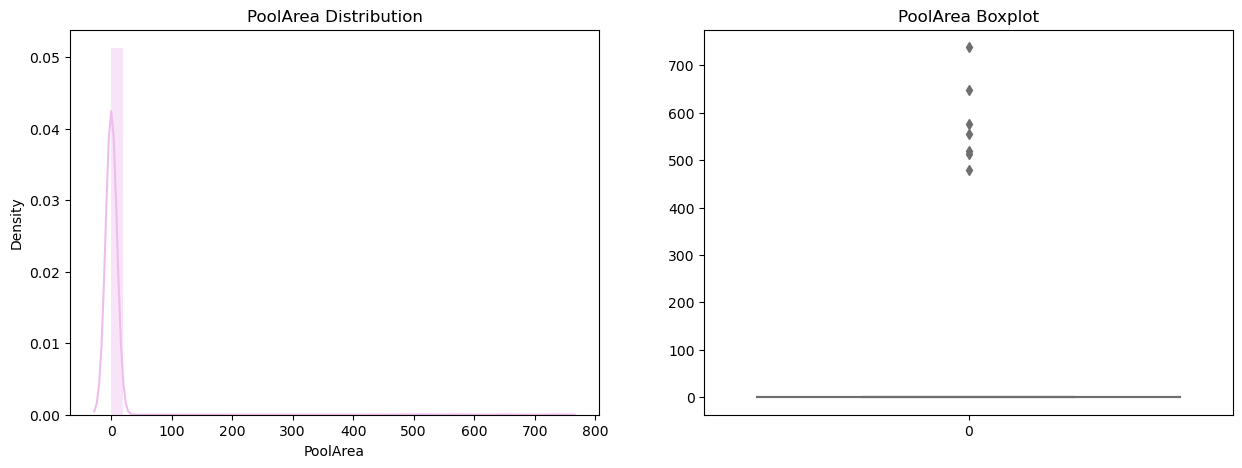

count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64
Skewness: 14.828374
Kurtosis: 223.268499
****************************


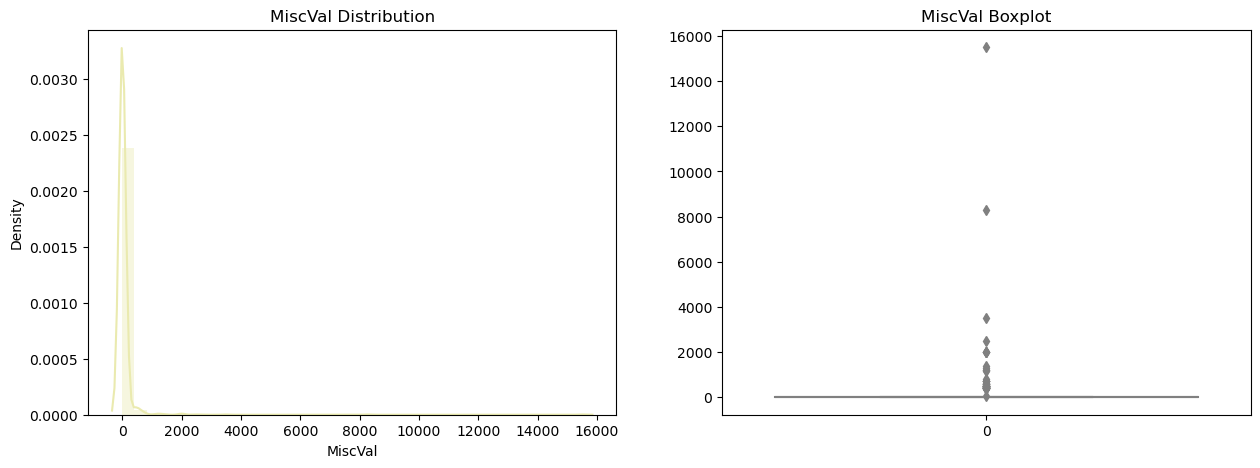

count     1460.000000
mean        43.489041
std        496.123024
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64
Skewness: 24.476794
Kurtosis: 701.003342
****************************


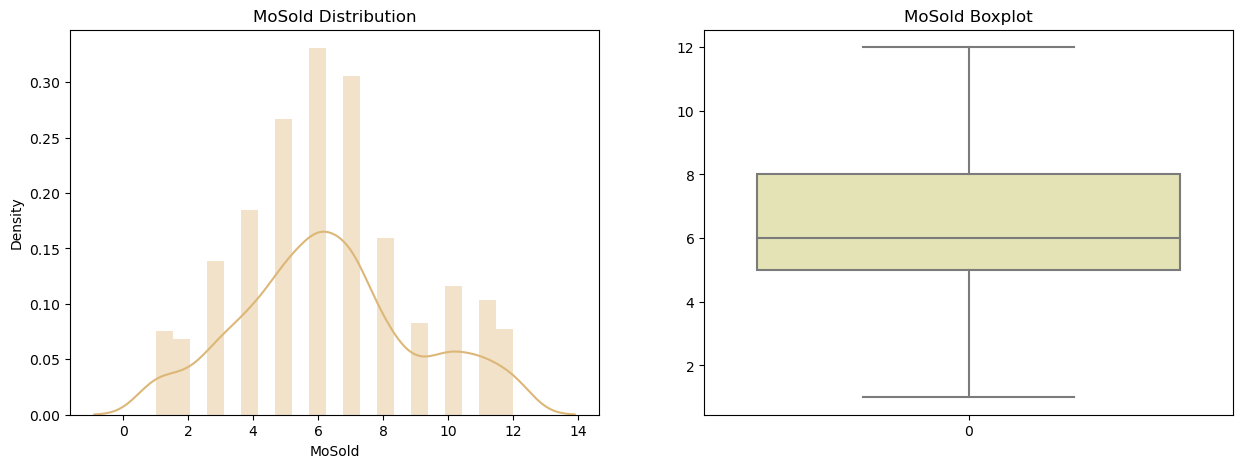

count    1460.000000
mean        6.321918
std         2.703626
min         1.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: MoSold, dtype: float64
Skewness: 0.212053
Kurtosis: -0.404109
****************************


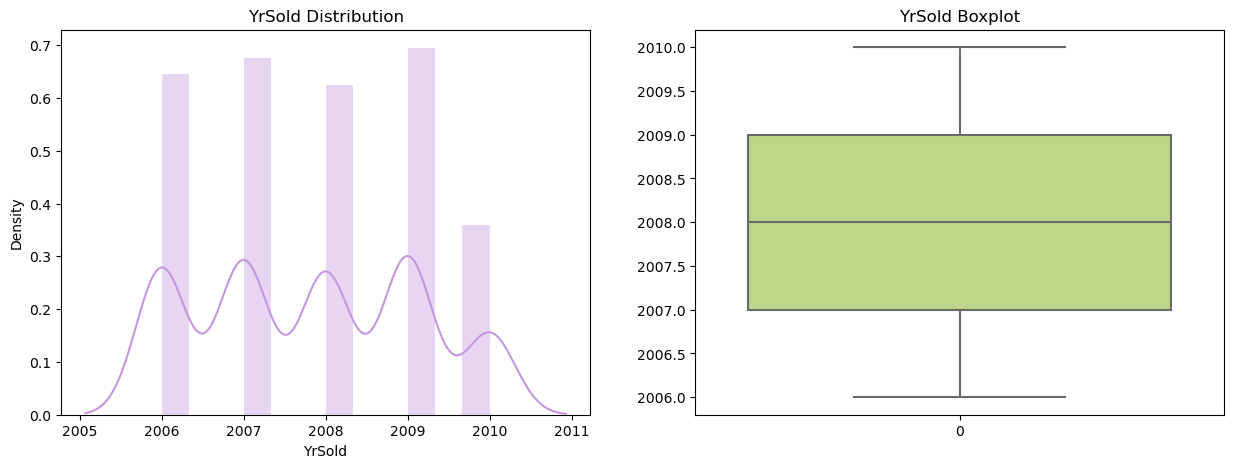

count    1460.000000
mean     2007.815753
std         1.328095
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64
Skewness: 0.096269
Kurtosis: -1.190601
****************************


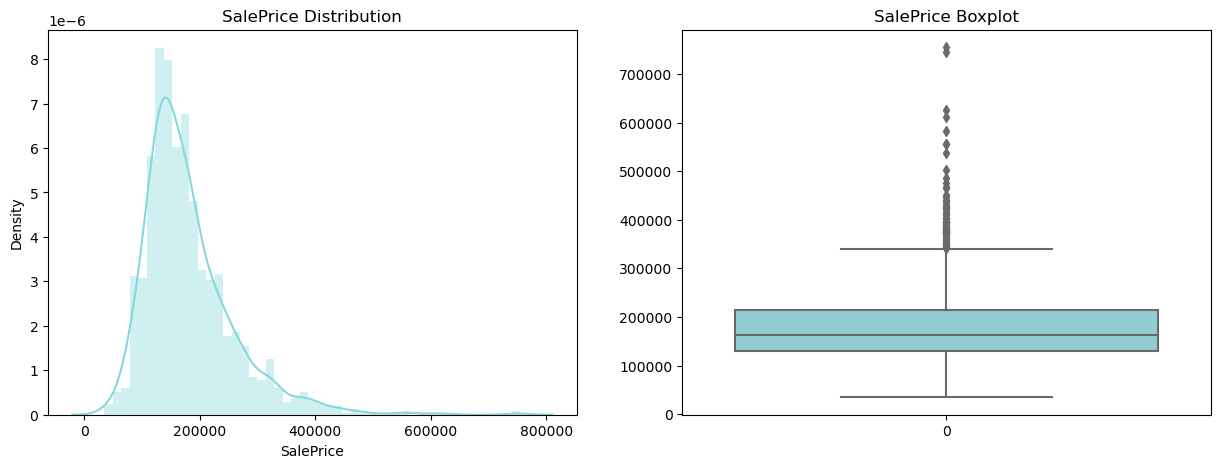

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
Skewness: 1.882876
Kurtosis: 6.536282
****************************


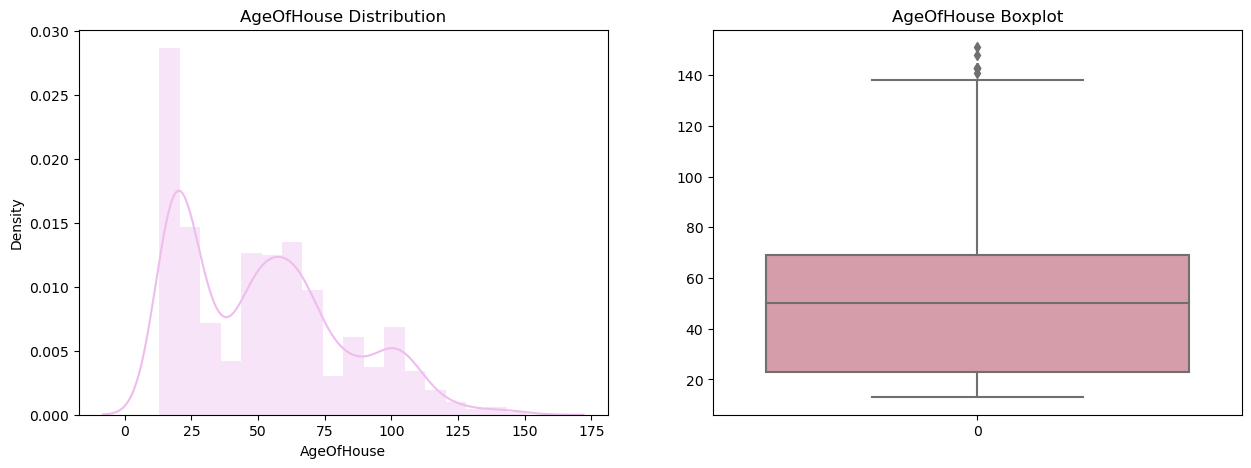

count    1460.000000
mean       51.732192
std        30.202904
min        13.000000
25%        23.000000
50%        50.000000
75%        69.000000
max       151.000000
Name: AgeOfHouse, dtype: float64
Skewness: 0.613461
Kurtosis: -0.439552
****************************


In [44]:
# distribution of the features

colors = ['#7DBCE6','#EEBDEE','#EAEAAF','#8FE195','#E28181',
          '#87D8DB','#C2E37D','#DF93A4','#DCB778','#C497DE']



def num_summary(dataframe, col_name):
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    sns.distplot(dataframe[col_name], ax=ax[0], color=np.random.choice(colors))
    ax[0].set_title(col_name + ' Distribution')
    sns.boxplot(dataframe[col_name], ax=ax[1], color=np.random.choice(colors))
    ax[1].set_title(col_name + ' Boxplot')
    plt.show()
    print(dataframe[col_name].describe().T)
    print("Skewness: %f" % dataframe[col_name].skew())
    print("Kurtosis: %f" % dataframe[col_name].kurt())
    print("****************************")


for i in num_cols:
    num_summary(df,i)

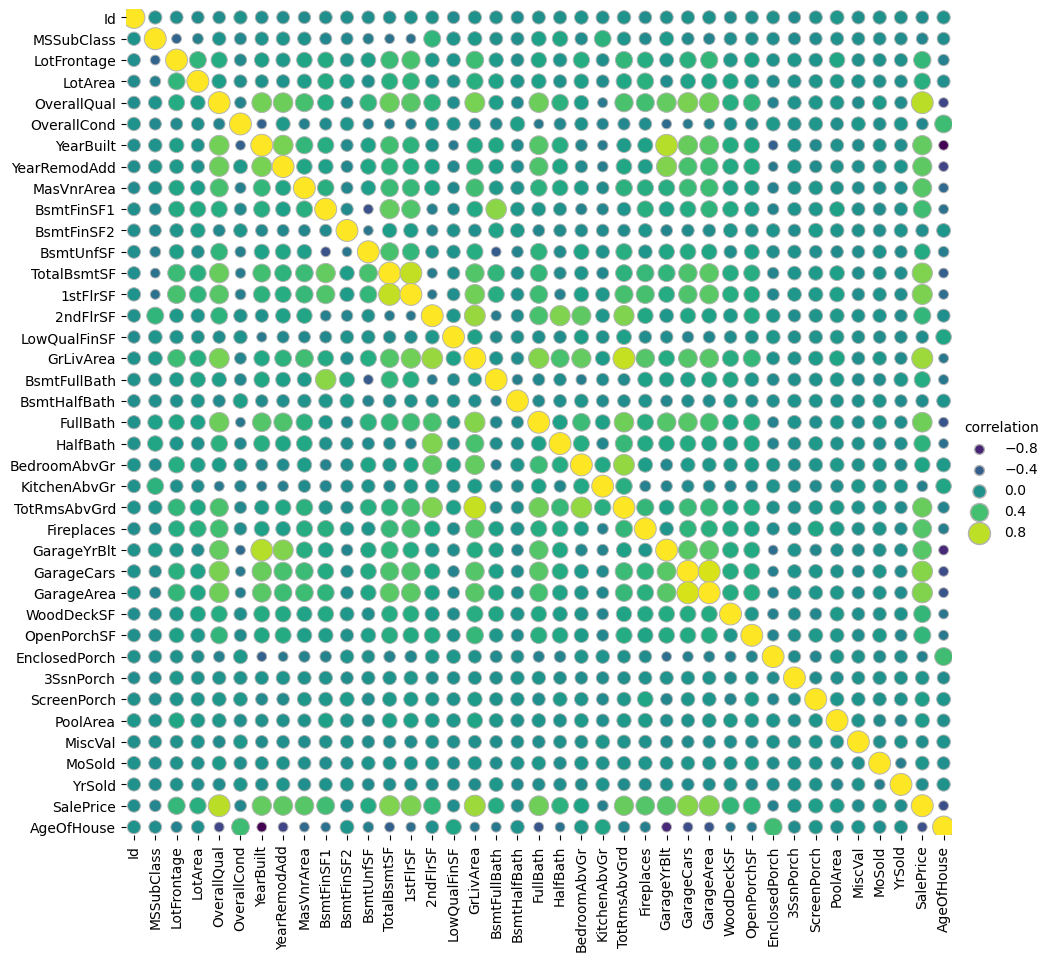

In [45]:
# Compute a correlation matrix and convert to long-form
num_cols = df.select_dtypes(include=np.number)
corr_mat = num_cols.corr().stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="viridis", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.01)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

Text(0.5, 1.0, 'Correlation Between Features')

<Figure size 4000x2000 with 0 Axes>

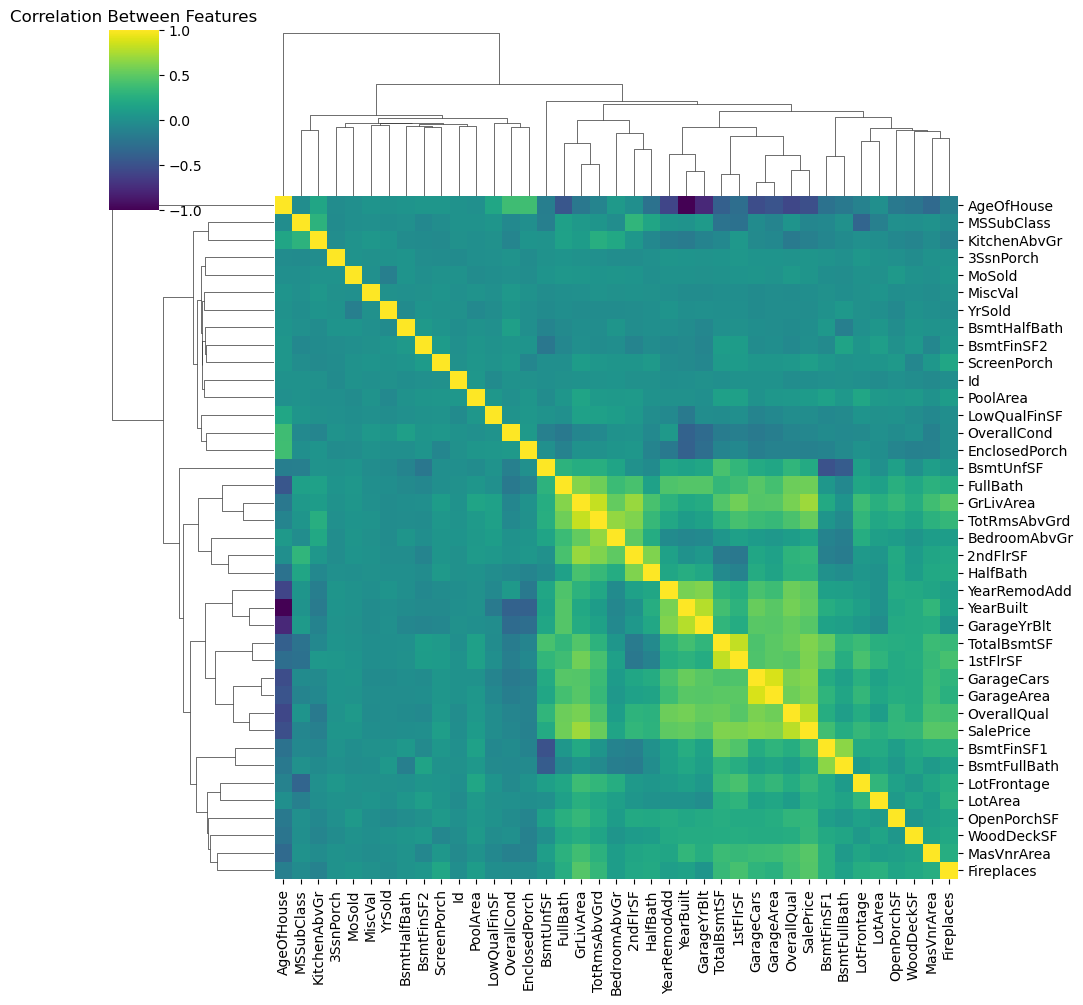

In [46]:
# correlation matrix:
num_cols = [col for col in df.columns if df[col].dtypes != 'O']
corr=df[num_cols].corr()
plt.figure(figsize=(40,20))
sns.clustermap(corr,cmap="viridis")
plt.title("Correlation Between Features")

In [47]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [48]:
# top 10 expensive neighborhoods:

a=df.groupby("Neighborhood")[["SalePrice"]].mean().round(3).sort_values(by="SalePrice",ascending=False).head(10)


px.scatter(a,x=a.index,y="SalePrice",title="Top 10 Expensive Neighborhoods",labels={"x":"Neighborhoods","y":"Sale Price"},
           color="SalePrice",color_continuous_scale=px.colors.sequential.Viridis,template="plotly_dark",size="SalePrice")



In [49]:
#building histogram to show how many houses sold for years.(with seaborn)

sales=px.histogram(df,x="YrSold",title="How many houses sold for years",color="YrSold",opacity=0.8,
                   barmode="group",labels={"YrSold":"Years"},template="plotly_dark",width=800,height=400);
sales.show()

In [50]:
#correlation between sale price and quality of the house:
snc=px.scatter(df,x="SalePrice",y="OverallQual",title="Correlation between Sale Price and Class of the House",
               labels={"SalePrice":"Sale Price","OverallQual":"Quality of the House"},template="plotly_dark")
snc.show()

In [51]:
#correlation between area of the house and sale price:
snc=px.scatter(df,x="SalePrice",y="GrLivArea",title="Correlation between Sale Price and Area of the House",
               labels={"SalePrice":"Sale Price","GrLivArea":"Area of the House"})
snc.show()

In [52]:
# What is the distribution of house prices in the dataset?
px.histogram(df,x="SalePrice",title="Distribution of House Prices",opacity=0.8,
                 labels={"SalePrice":"Sale Price"},template="plotly_dark")

In [53]:
len(num_cols)

39

<function matplotlib.pyplot.show(close=None, block=None)>

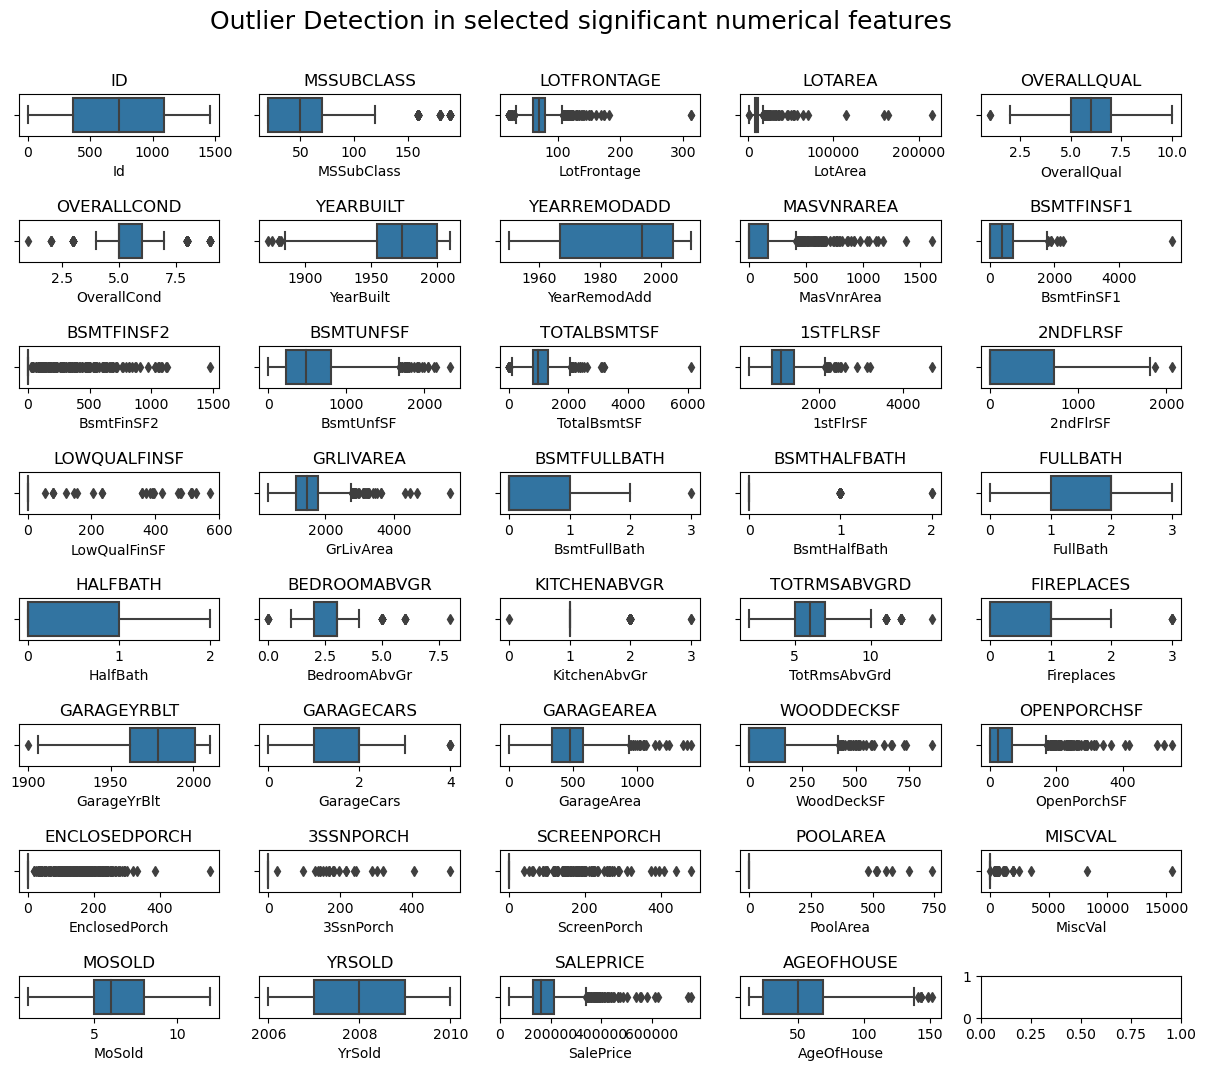

In [54]:
# outliers detection:
# outlier detection function:


# Selecting related features:
num=df.select_dtypes(include=['int64','float64'])



fig, axs = plt.subplots(nrows=8, ncols=5, figsize=(15, 12))
plt.subplots_adjust(hspace=2)
fig.suptitle("Outlier Detection in selected significant numerical features", fontsize=18, y=0.95)

# loop through tickers and axes
for ticker, ax in zip(num, axs.ravel()):
    # filter df for ticker and plot on specified axes
    sns.boxplot(data=num, x=ticker, ax=ax)
    # chart formatting
    ax.set_title(ticker.upper())


plt.show



    

In [55]:
def outlier_thresholds(dataframe,col_name,q1=0.25,q3=0.75):
    q1=dataframe[col_name].quantile(q1)
    q3=dataframe[col_name].quantile(q3)
    IQR=q3-q1
    
    up_limit=q3+1.5*IQR
    low_limit=q1-1.5*IQR
    
    return low_limit,up_limit


def check_outliers(dataframe,col_name):
    low_limit,up_limit=outlier_thresholds(dataframe,col_name)
    if dataframe[(dataframe[col_name]<low_limit) | (dataframe[col_name]>up_limit)].any(axis=None):
        return True 
   
    else:
        return False

In [56]:
# replacing outliers with thresholds:
def replace_with_thresholds(dataframe, col):
    low_limit, up_limit = outlier_thresholds(dataframe, col)
    if low_limit > 0:
        dataframe.loc[(dataframe[col] < low_limit), col] = low_limit
        dataframe.loc[(dataframe[col] > up_limit), col] = up_limit
    else:
        dataframe.loc[(dataframe[col] > up_limit), col] = up_limit

replace_with_thresholds(df,"SalePrice")


In [57]:
# after replacing outliers with thresholds
px.box(df,x="SalePrice",title="Outliers Detection",template="plotly_dark")

In [58]:
# label encoding:

# if catorical column has 2 unique values, then use label encoder 
# if categorical column has more than 2 unique values and less than 10 unique values, then use one hot encoder.
def label_encoder(df, column_name):
    if df[column_name].dtype == 'object':
        if df[column_name].nunique() <= 2:
            le = LabelEncoder()
            df[column_name] = le.fit_transform(df[column_name])
            return df
        elif df[column_name].nunique() > 2  and df[column_name].nunique() <= 10:
            ohe = OneHotEncoder()
            ohe_df = pd.DataFrame(ohe.fit_transform(df[[column_name]]).toarray())
            ohe_df.columns = [column_name + "_" + str(i) for i in ohe_df.columns]
            df = df.join(ohe_df)
            df = df.drop(column_name, axis=1)
            return df
        else:
            return df
        
    else:
        return df
    
    
for i in df.columns:
    df = label_encoder(df, i)

In [59]:
df.head()

Id  MSSubClass  LotFrontage  LotArea  Street  Utilities Neighborhood  \
0  1.0        60.0         65.0   8450.0       1          0      CollgCr   
1  2.0        20.0         80.0   9600.0       1          0      Veenker   
2  3.0        60.0         68.0  11250.0       1          0      CollgCr   
3  4.0        70.0         60.0   9550.0       1          0      Crawfor   
4  5.0        60.0         84.0  14260.0       1          0      NoRidge   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd Exterior1st Exterior2nd  \
0          7.0          5.0     2003.0        2003.0     VinylSd     VinylSd   
1          6.0          8.0     1976.0        1976.0     MetalSd     MetalSd   
2          7.0          5.0     2001.0        2002.0     VinylSd     VinylSd   
3          7.0          5.0     1915.0        1970.0     Wd Sdng     Wd Shng   
4          8.0          5.0     2000.0        2000.0     VinylSd     VinylSd   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  CentralAir  \
0       196.0       706.0         0.0      150.0        856.0           1   
1         0.0       978.0         0.0      284.0       1262.0           1   
2       162.0       486.0         0.0      434.0        920.0           1   
3         0.0       216.0         0.0      540.0        756.0           1   
4       350.0       655.0         0.0      490.0       1145.0           1   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0     856.0     854.0           0.0     1710.0           1.0           0.0   
1    1262.0       0.0           0.0     1262.0           0.0           1.0   
2     920.0     866.0           0.0     1786.0           1.0           0.0   
3     961.0     756.0           0.0     1717.0           1.0           0.0   
4    1145.0    1053.0           0.0     2198.0           1.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0       2.0       1.0           3.0           1.0           8.0         0.0   
1       2.0       0.0           3.0           1.0           6.0         1.0   
2       2.0       1.0           3.0           1.0           6.0         1.0   
3       1.0       0.0           3.0           1.0           7.0         1.0   
4       2.0       1.0           4.0           1.0           9.0         1.0   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0         2.0       548.0         0.0         61.0   
1       1976.0         2.0       460.0       298.0          0.0   
2       2001.0         2.0       608.0         0.0         42.0   
3       1998.0         3.0       642.0         0.0         35.0   
4       2000.0         3.0       836.0       192.0         84.0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0            0.0        0.0          0.0       0.0      0.0     2.0  2008.0   
1            0.0        0.0          0.0       0.0      0.0     5.0  2007.0   
2            0.0        0.0          0.0       0.0      0.0     9.0  2008.0   
3          272.0        0.0          0.0       0.0      0.0     2.0  2006.0   
4            0.0        0.0          0.0       0.0      0.0    12.0  2008.0   

   SalePrice  AgeOfHouse  MSZoning_0  MSZoning_1  MSZoning_2  MSZoning_3  \
0   208500.0        20.0         0.0         0.0         0.0         1.0   
1   181500.0        47.0         0.0         0.0         0.0         1.0   
2   223500.0        22.0         0.0         0.0         0.0         1.0   
3   140000.0       108.0         0.0         0.0         0.0         1.0   
4   250000.0        23.0         0.0         0.0         0.0         1.0   

   MSZoning_4  LotShape_0  LotShape_1  LotShape_2  LotShape_3  LandContour_0  \
0         0.0         0.0         0.0         0.0         1.0            0.0   
1         0.0         0.0         0.0         0.0         1.0            0.0   
2         0.0         1.0         0.0         0.0         0.0            0.0   
3   

In [60]:
df.drop(["Id","Neighborhood","Exterior1st","Exterior2nd"],axis=1,inplace=True)
X=df.drop(["SalePrice"],axis=1).values
y=df["SalePrice"].values.reshape(-1,1)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (1168, 216)
X_test shape:  (292, 216)
y_train shape:  (1168, 1)
y_test shape:  (292, 1)


In [61]:
# standization and normalization data

rb=RobustScaler()
X_train=rb.fit_transform(X_train)
X_test=rb.transform(X_test)

In [62]:
# regression algorithms
from xgboost import XGBRegressor


xgb=XGBRegressor()
lr=LinearRegression()
svr=SVR()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
gr=GradientBoostingRegressor()
knn=KNeighborsRegressor()
gb=GaussianProcessRegressor()


models = [ lr, svr, dt, rf, gr, knn,gb,xgb]
overral=pd.DataFrame(columns=["Model","R2 Score",
                              "RMSE","MAE","MAPE","MSE"])
for model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    r2=r2_score(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    mape=mean_absolute_percentage_error(y_test,y_pred)
    
    
    overral=overral._append({"Model":model.__class__.__name__,
                            "R2 Score":r2,
                            "RMSE":rmse,
                            "MAE":mae,
                            "MAPE":mape*100,
                            "MSE":mse},ignore_index=True)
    

overral=overral.sort_values(by="R2 Score",ascending=False)
overral=overral.style.background_gradient(cmap="Blues")
overral